## Restaurant Operations Analysis - Data Visualization using Pandas, Matplotlib and Seaborn.

### Importing Required Libraries

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Establishing Database Connection

In [5]:
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "your_password",
                            database = "restaurant_db")
cur = db.cursor()

### Objective 1
#### Explore the menu_items table to get an idea of what's on the New Menu.

In [7]:
query = '''
SELECT * FROM menu_items
'''
cur.execute(query)
data = cur.fetchall()
menu_df = pd.DataFrame(data)
menu_df.rename(columns = {0:'Item ID', 1:'Item Name', 2:'Cuisine', 3:'Price'}, inplace = True)
menu_df

,Item ID,Item Name,Cuisine,Price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00
5,106,French Fries,American,7.00
6,107,Orange Chicken,Asian,16.50
7,108,Tofu Pad Thai,Asian,14.50
8,109,Korean Beef Bowl,Asian,17.95
9,110,Pork Ramen,Asian,17.95


In [8]:
menu_df.shape

(32, 4)

In [9]:
# Checking for null values
menu_df.isnull().sum()

Item ID      0
Item Name    0
Cuisine      0
Price        0
dtype: int64

In [10]:
# Checking for Duplicate Values
menu_df.duplicated().sum()

0

#### 2. Find the number of items on the menu.

In [12]:
query = '''
SELECT COUNT(*) FROM menu_items
'''
cur.execute(query)
data = cur.fetchall()
total_items = int(*([d[0] for d in data]))
print("Total Number of Items on the New Menu are " + str(total_items) + ".")

Total Number of Items on the New Menu are 32.


#### 3. How many types of cuisines are served? Also, how many items are there within each cuisine?

In [14]:
query = '''
SELECT category, COUNT(item_name)
FROM menu_items
GROUP BY category
ORDER BY COUNT(item_name) DESC;
'''
cur.execute(query)
data = cur.fetchall()
cuisine_df = pd.DataFrame(data)
cuisine_df.rename(columns = {0:'Cuisine', 1:'Total Number of Items'}, inplace = True)
cuisine_df

,Cuisine,Total Number of Items
0,Mexican,9
1,Italian,9
2,Asian,8
3,American,6


#### 4. What are the least and most expensive items on the menu? 

In [16]:
query = '''
SELECT item_name, price, category
FROM menu_items
ORDER BY price
'''
cur.execute(query)
data = cur.fetchall()
items_df = pd.DataFrame(data)
items_df.rename(columns = {0:'Item Name', 1:'Price', 2:'Cuisine'}, inplace = True)
items_df

,Item Name,Price,Cuisine
0,Edamame,5.00,Asian
1,Mac & Cheese,7.00,American
2,French Fries,7.00,American
3,Chips & Salsa,7.00,Mexican
4,Hot Dog,9.00,American
5,Potstickers,9.00,Asian
6,Chips & Guacamole,9.00,Mexican
7,Veggie Burger,10.50,American
8,Cheese Quesadillas,10.50,Mexican
9,California Roll,11.95,Asian


Text(0.5, 1.0, 'Least to Most Expensive Items on the New Menu')

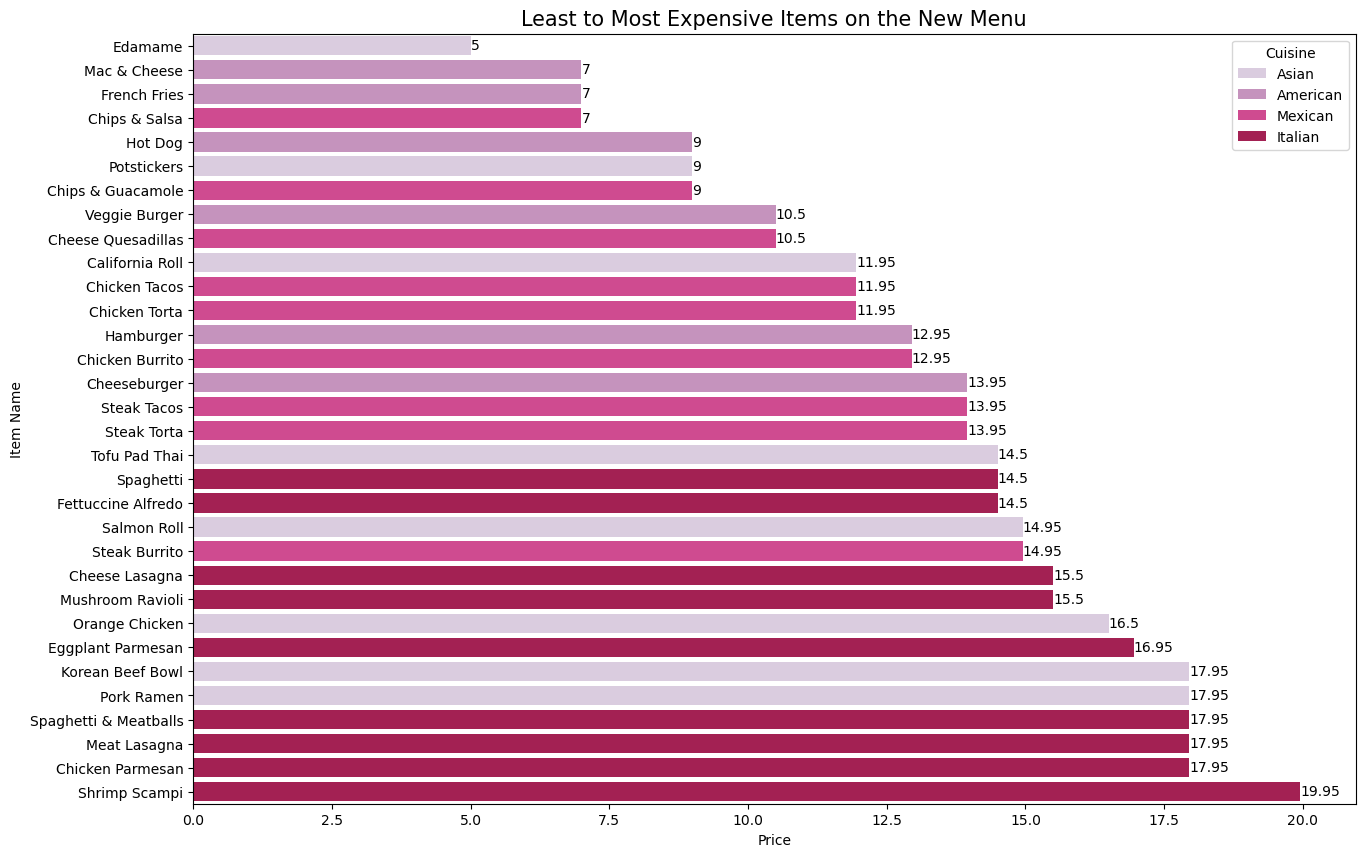

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(items_df, x = 'Price', y = 'Item Name', hue = 'Cuisine', ax = ax, palette = 'PuRd')
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Least to Most Expensive Items on the New Menu", fontsize = 15)

#### 5. What are the least and most expensive cuisine on the menu according to average price per cuisine?

In [19]:
query = '''
SELECT category, ROUND(AVG(price),2), COUNT(item_name)
FROM menu_items
GROUP BY category
ORDER BY AVG(price) DESC;
'''
cur.execute(query)
data = cur.fetchall()
cuiavg_df = pd.DataFrame(data)
cuiavg_df.rename(columns = {0:'Cuisine', 1:'Average Item Price', 2:'Total Number of Items'}, inplace = True)
cuiavg_df

,Cuisine,Average Item Price,Total Number of Items
0,Italian,16.75,9
1,Asian,13.48,8
2,Mexican,11.80,9
3,American,10.07,6


Text(0.5, 1.0, 'Least to Most Expensive Cuisine w.r.t. Average Item Price')

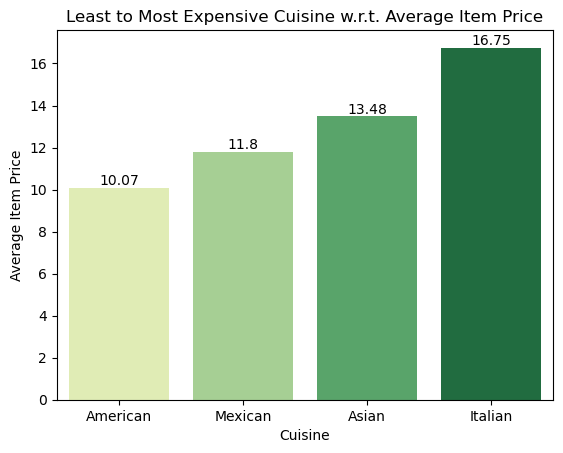

In [20]:
bp = sns.barplot(cuiavg_df.sort_values(by = 'Average Item Price'), x = 'Cuisine', y = 'Average Item Price', hue = 'Cuisine', palette = 'YlGn')
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Least to Most Expensive Cuisine w.r.t. Average Item Price")

#### 6. What are the least and most expensive items on the menu cuisine-wise?

In [22]:
query = '''
SELECT item_name, price, category
FROM menu_items
WHERE category = 'American'
ORDER BY price DESC
'''
cur.execute(query)
data = cur.fetchall()
american = pd.DataFrame(data)
american.rename(columns = {0:'Item Name', 1:'Price', 2:'Cuisine'}, inplace = True)
american

,Item Name,Price,Cuisine
0,Cheeseburger,13.95,American
1,Hamburger,12.95,American
2,Veggie Burger,10.50,American
3,Hot Dog,9.00,American
4,Mac & Cheese,7.00,American
5,French Fries,7.00,American


In [23]:
query = '''
SELECT item_name, price, category
FROM menu_items
WHERE category = 'Asian'
ORDER BY price DESC
'''
cur.execute(query)
data = cur.fetchall()
asian = pd.DataFrame(data)
asian.rename(columns = {0:'Item Name', 1:'Price', 2:'Cuisine'}, inplace = True)
asian

,Item Name,Price,Cuisine
0,Korean Beef Bowl,17.95,Asian
1,Pork Ramen,17.95,Asian
2,Orange Chicken,16.50,Asian
3,Salmon Roll,14.95,Asian
4,Tofu Pad Thai,14.50,Asian
5,California Roll,11.95,Asian
6,Potstickers,9.00,Asian
7,Edamame,5.00,Asian


In [24]:
query = '''
SELECT item_name, price, category
FROM menu_items
WHERE category = 'Italian'
ORDER BY price DESC
'''
cur.execute(query)
data = cur.fetchall()
italian = pd.DataFrame(data)
italian.rename(columns = {0:'Item Name', 1:'Price', 2:'Cuisine'}, inplace = True)
italian

,Item Name,Price,Cuisine
0,Shrimp Scampi,19.95,Italian
1,Spaghetti & Meatballs,17.95,Italian
2,Meat Lasagna,17.95,Italian
3,Chicken Parmesan,17.95,Italian
4,Eggplant Parmesan,16.95,Italian
5,Cheese Lasagna,15.50,Italian
6,Mushroom Ravioli,15.50,Italian
7,Spaghetti,14.50,Italian
8,Fettuccine Alfredo,14.50,Italian


In [25]:
query = '''
SELECT item_name, price, category
FROM menu_items
WHERE category = 'Mexican'
ORDER BY price DESC
'''
cur.execute(query)
data = cur.fetchall()
mexican = pd.DataFrame(data)
mexican.rename(columns = {0:'Item Name', 1:'Price', 2:'Cuisine'}, inplace = True)
mexican

,Item Name,Price,Cuisine
0,Steak Burrito,14.95,Mexican
1,Steak Tacos,13.95,Mexican
2,Steak Torta,13.95,Mexican
3,Chicken Burrito,12.95,Mexican
4,Chicken Tacos,11.95,Mexican
5,Chicken Torta,11.95,Mexican
6,Cheese Quesadillas,10.50,Mexican
7,Chips & Guacamole,9.00,Mexican
8,Chips & Salsa,7.00,Mexican


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Chips & Salsa'),
  Text(1, 0, 'Chips & Guacamole'),
  Text(2, 0, 'Cheese Quesadillas'),
  Text(3, 0, 'Chicken Tacos'),
  Text(4, 0, 'Chicken Torta'),
  Text(5, 0, 'Chicken Burrito'),
  Text(6, 0, 'Steak Tacos'),
  Text(7, 0, 'Steak Torta'),
  Text(8, 0, 'Steak Burrito')])

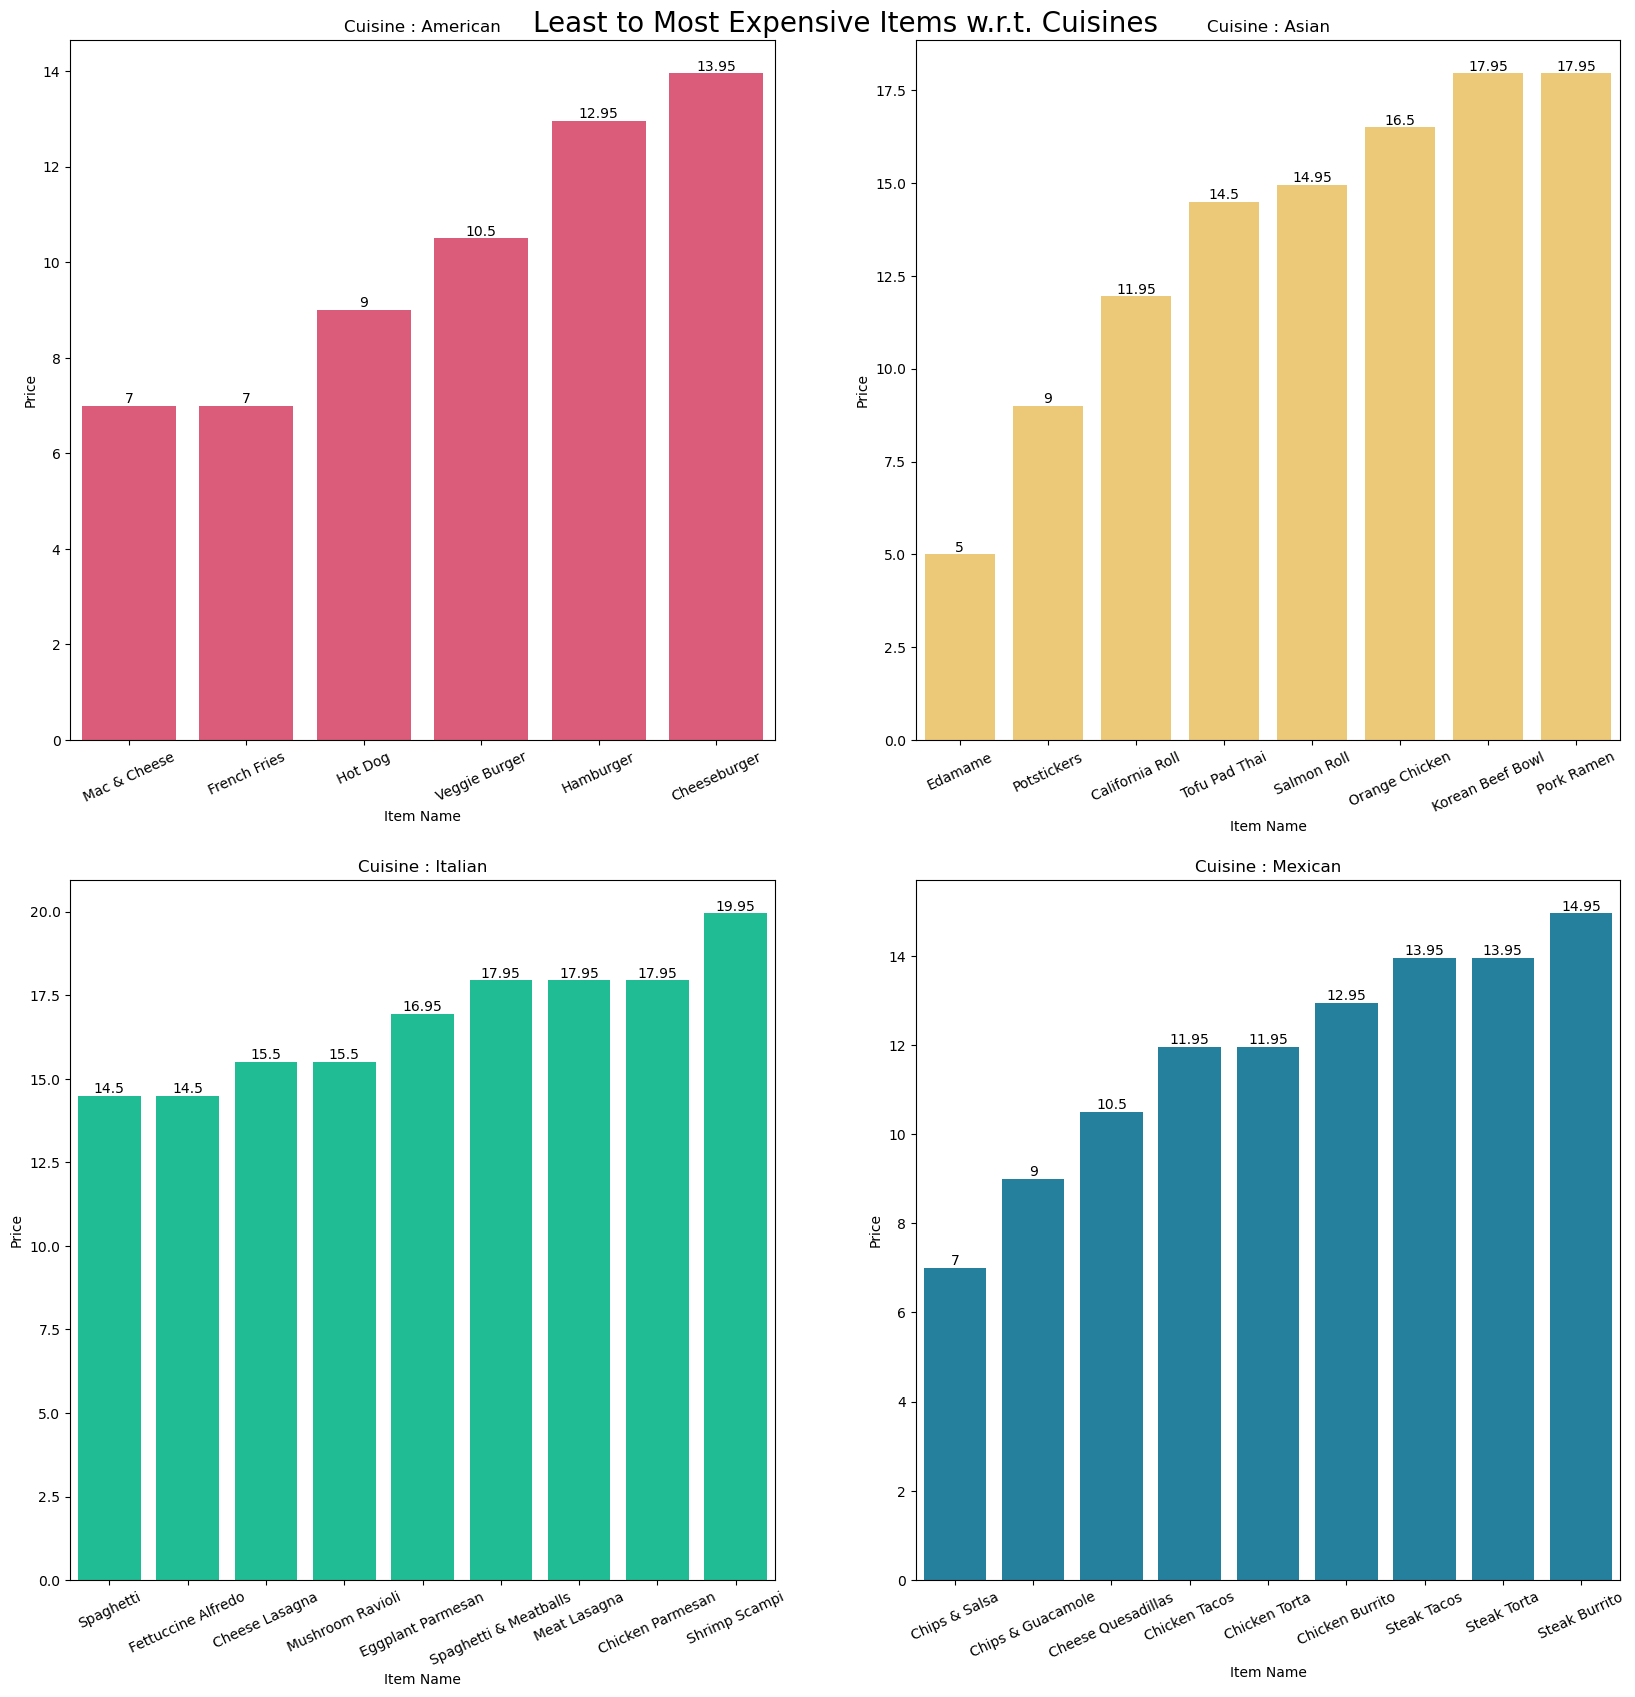

In [26]:
plt.figure(figsize = (20, 20))
plt.axis('Off')
plt.title("Least to Most Expensive Items w.r.t. Cuisines", fontsize = 20)
plt.subplot(2,2,1)
plt.title("Cuisine : American")
ibp = sns.barplot(american.sort_values(by = 'Price'), x = 'Item Name', y = 'Price', color = '#EF476F')
for i in ibp.containers:
    ibp.bar_label(i,)
plt.xticks(rotation = 25)
plt.subplot(2,2,2)
plt.title("Cuisine : Asian")
ibp = sns.barplot(asian.sort_values(by = 'Price'), x = 'Item Name', y = 'Price', color = '#FFD166')
for i in ibp.containers:
    ibp.bar_label(i,)
plt.xticks(rotation = 25)
plt.subplot(2,2,3)
plt.title("Cuisine : Italian")
ibp = sns.barplot(italian.sort_values(by = 'Price'), x = 'Item Name', y = 'Price', color = '#06D6A0')
for i in ibp.containers:
    ibp.bar_label(i,)
plt.xticks(rotation = 25)
plt.subplot(2,2,4)
plt.title("Cuisine : Mexican")
ibp = sns.barplot(mexican.sort_values(by = 'Price'), x = 'Item Name', y = 'Price', color = '#118AB2')
for i in ibp.containers:
    ibp.bar_label(i,)
plt.xticks(rotation = 25)

### Objective 2
#### Explore the order_details table to get an idea of the data that has been collected.

#### 1. View the order_details table. 

In [29]:
query = '''SELECT * FROM order_details'''
cur.execute(query)
data = cur.fetchall()
order_df = pd.DataFrame(data)
order_df.rename(columns = {0:'Order Index', 1:'Order ID', 2:'Order Date', 3:'Order Time', 4:'Item ID', 5:'Order Time Section', 6:'Order Month'}, inplace = True)
order_df = order_df.set_index('Order Index')
order_df

,Order ID,Order Date,Order Time,Item ID,Order Time Section,Order Month
Order Index,,,,,,
1,1,2023-01-01,0 days 11:38:36,109,Brunch,January
2,2,2023-01-01,0 days 11:57:40,108,Brunch,January
3,2,2023-01-01,0 days 11:57:40,124,Brunch,January
4,2,2023-01-01,0 days 11:57:40,117,Brunch,January
5,2,2023-01-01,0 days 11:57:40,129,Brunch,January
...,...,...,...,...,...,...
12230,5369,2023-03-31,0 days 22:05:04,109,Dinner,March
12231,5369,2023-03-31,0 days 22:05:04,129,Dinner,March
12232,5369,2023-03-31,0 days 22:05:04,120,Dinner,March


In [30]:
order_df.shape

(12097, 6)

In [31]:
# Checking for null values
order_df.isnull().sum()

Order ID              0
Order Date            0
Order Time            0
Item ID               0
Order Time Section    0
Order Month           0
dtype: int64

In [32]:
# Removing 0 days from Order Time column
order_df['Order Time'] = order_df['Order Time'].astype(str).str.split(' ').str[-1]
order_df

,Order ID,Order Date,Order Time,Item ID,Order Time Section,Order Month
Order Index,,,,,,
1,1,2023-01-01,11:38:36,109,Brunch,January
2,2,2023-01-01,11:57:40,108,Brunch,January
3,2,2023-01-01,11:57:40,124,Brunch,January
4,2,2023-01-01,11:57:40,117,Brunch,January
5,2,2023-01-01,11:57:40,129,Brunch,January
...,...,...,...,...,...,...
12230,5369,2023-03-31,22:05:04,109,Dinner,March
12231,5369,2023-03-31,22:05:04,129,Dinner,March
12232,5369,2023-03-31,22:05:04,120,Dinner,March


#### 2. Find total number of orders.

In [34]:
query = '''
SELECT COUNT(DISTINCT order_id) 
FROM order_details;
'''
cur.execute(query)
data = cur.fetchall()
total_orders = int(*([d[0] for d in data]))
print("Total Number of Orders are " + str(total_orders) + ".")

Total Number of Orders are 5343.


#### 3. What is the date range of the table?

In [36]:
query = '''
SELECT MIN(order_date), MAX(order_date) 
FROM order_details; 
'''
cur.execute(query)
data = cur.fetchall()
first_date = str(*([d[0] for d in data]))
last_date = str(*([d[1] for d in data]))
print(f"The orders are recorded between {first_date} and {last_date}")

The orders are recorded between 2023-01-01 and 2023-03-31


#### 4. How many orders were made within this data range?

In [38]:
query = '''
SELECT COUNT(DISTINCT order_id) 
FROM order_details  
WHERE order_date BETWEEN "2023-01-01" AND "2023-03-31";
'''
cur.execute(query)
data = cur.fetchall()
orders = str(*([d[0] for d in data]))
print(f"{orders} orders were recorded between 2023-01-01 and 2023-03-31")

5343 orders were recorded between 2023-01-01 and 2023-03-31


#### 5. How many items were ordered within this data range?

In [40]:
query = '''
SELECT COUNT(item_id) 
FROM order_details  
WHERE order_date BETWEEN "2023-01-01" AND "2023-03-31";
'''
cur.execute(query)
data = cur.fetchall()
items = str(*([d[0] for d in data]))
print(f"{items} items were sold between 2023-01-01 and 2023-03-31")

12097 items were sold between 2023-01-01 and 2023-03-31


#### 6. Which orders had the most number of items?

In [42]:
query = '''
SELECT order_id, COUNT(item_id)
FROM order_details
GROUP BY order_id
ORDER BY COUNT(item_id) DESC
'''
cur.execute(query)
data = cur.fetchall()
order_count = pd.DataFrame(data)
order_count.rename(columns = {0:'Order ID', 1:'Total Number of Items'}, inplace = True)
order_count.head(15)

,Order ID,Total Number of Items
0,330,14
1,440,14
2,443,14
3,1957,14
4,2675,14
5,3473,14
6,4305,14
7,1274,13
8,1569,13
9,1685,13


#### 7. What are average number of items ordered per order?

In [44]:
query = '''
SELECT AVG(Item_Count) FROM 
(
SELECT order_id, COUNT(item_id) AS Item_Count
FROM order_details
GROUP BY order_id
ORDER BY COUNT(item_id)
) AS ItemCount
'''
cur.execute(query)
data = cur.fetchall()
avg_items_per_order = float(*([d[0] for d in data]))
print(f"Average Number of Items Ordered per Order is {avg_items_per_order}.")

Average Number of Items Ordered per Order is 2.2641.


#### 8. Find Restaurant Opening and Closing Time.

In [46]:
query = '''
SELECT order_time
FROM order_details
ORDER BY order_time ASC
'''
cur.execute(query)
data = cur.fetchall()
time = pd.DataFrame(data)
time.rename(columns = {0:'Order Time'}, inplace = True)
time['Order Time'] = time['Order Time'].astype(str).str.split(' ').str[-1]
open = time['Order Time'].min()
close = time['Order Time'].max()
print(f"The earliest any order recieved among all the days is at {open} and the last order received among all the days is at {close}.")
print("It can be assumed that the restaurant may open for service from 10:30 am and close around 11:30 pm.")

The earliest any order recieved among all the days is at 10:50:46 and the last order received among all the days is at 23:05:24.
It can be assumed that the restaurant may open for service from 10:30 am and close around 11:30 pm.


#### 9. Find total number of orders within each order section.

In [48]:
query = '''
SELECT order_section, COUNT(DISTINCT order_id)
FROM order_details
GROUP BY order_section
ORDER BY COUNT(DISTINCT order_id);
'''
cur.execute(query)
data = cur.fetchall()
sections = pd.DataFrame(data)
sections.rename(columns = {0:'Order Time Section', 1:'Total Number of Orders'}, inplace = True)
sections

,Order Time Section,Total Number of Orders
0,Brunch,288
1,Snack Time,833
2,Dinner,855
3,Lunch,1657
4,Happy Hour,1710


#### 10. Find Time Sections with Least and Most Number of Orders made.

Text(0.5, 1.0, 'Order Time Section by Total Orders')

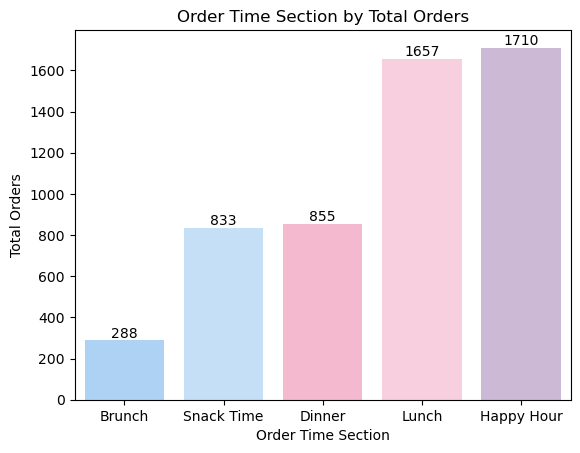

In [50]:
query = '''
SELECT order_section, COUNT(DISTINCT order_id)
FROM order_details
GROUP BY order_section
ORDER BY COUNT(DISTINCT order_id);
'''
cur.execute(query)
data = cur.fetchall()
sections = pd.DataFrame(data)
sections.rename(columns = {0:'Order Time Section', 1:'Total Orders'}, inplace = True)
cl = ['#A2D2FF', '#BDE0FE', '#FFAFCC', '#FFC8DD', '#CDB4DB']
bp = sns.barplot(sections, x = 'Order Time Section', y = 'Total Orders', hue = 'Order Time Section', palette = cl)
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Order Time Section by Total Orders")

#### 11. Find monthwise distribution of total number of orders.

In [52]:
query = '''
SELECT order_month, COUNT(order_id)
FROM order_details
GROUP BY order_month
ORDER BY COUNT(order_id) DESC;
'''
cur.execute(query)
data = cur.fetchall()
months = pd.DataFrame(data)
months.rename(columns = {0:'Order Month', 1:'Total Orders'}, inplace = True)
new_order = [1, 2, 0]
months = months.reindex(new_order, axis=0)
months.reset_index(drop = True)

,Order Month,Total Orders
0,January,4104
1,February,3851
2,March,4142


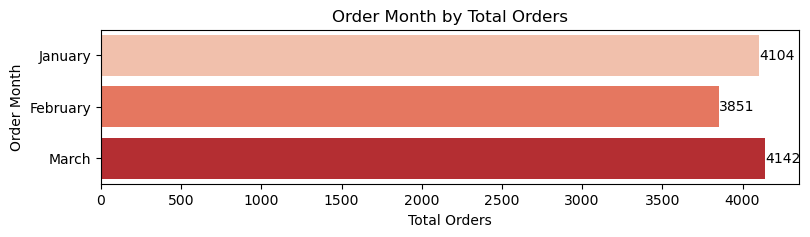

In [53]:
plt.figure(figsize = (9, 2))
plt.title("Order Month by Total Orders", fontsize = 12)
bp = sns.barplot(months, x = 'Total Orders', y = 'Order Month', hue = 'Order Month', legend = False, palette='Reds')
for i in bp.containers:
    bp.bar_label(i,)

### Objective 3
#### Use both the tables to understand how Customers are reacting to the New Menu.

#### 1. Join the menu_items and order_details tables together.

In [56]:
query = '''
SELECT * FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id;
'''
cur.execute(query)
data = cur.fetchall()
combo_df = pd.DataFrame(data)
combo_df.rename(columns = {0:"Order Index", 1:"Order ID", 2:"Order Date", 3:"Order Time", 4:"Item ID", 5:"Order Time Section", 6:"Order Month", 8:'Item Name', 9:'Cuisine', 10:'Price'}, inplace = True)
combo_df = combo_df.set_index('Order Index')
combo_df = combo_df.drop(7, axis = 1)
# Removing 0 days from Order Time column
combo_df['Order Time'] = combo_df['Order Time'].astype(str).str.split(' ').str[-1]
combo_df

,Order ID,Order Date,Order Time,Item ID,Order Time Section,Order Month,Item Name,Cuisine,Price
Order Index,,,,,,,,,
1,1,2023-01-01,11:38:36,109,Brunch,January,Korean Beef Bowl,Asian,17.95
2,2,2023-01-01,11:57:40,108,Brunch,January,Tofu Pad Thai,Asian,14.50
3,2,2023-01-01,11:57:40,124,Brunch,January,Spaghetti,Italian,14.50
4,2,2023-01-01,11:57:40,117,Brunch,January,Chicken Burrito,Mexican,12.95
5,2,2023-01-01,11:57:40,129,Brunch,January,Mushroom Ravioli,Italian,15.50
...,...,...,...,...,...,...,...,...,...
12230,5369,2023-03-31,22:05:04,109,Dinner,March,Korean Beef Bowl,Asian,17.95
12231,5369,2023-03-31,22:05:04,129,Dinner,March,Mushroom Ravioli,Italian,15.50
12232,5369,2023-03-31,22:05:04,120,Dinner,March,Steak Torta,Mexican,13.95


#### 2. How many times each item was ordered? Also, find Item wise Sales

In [58]:
query = '''
SELECT menu_item_id, item_name, category, price, COUNT(item_id), price * COUNT(item_id)
FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY menu_item_id, item_name
ORDER BY menu_item_id
'''
cur.execute(query)
data = cur.fetchall()
item_sales = pd.DataFrame(data)
item_sales.rename(columns = {0:'Item ID', 1:'Item Name', 2:'Cuisine', 3:'Price', 4:'Total Orders', 5:'Total Sales'}, inplace = True)
item_sales

,Item ID,Item Name,Cuisine,Price,Total Orders,Total Sales
0,101,Hamburger,American,12.95,622,8054.90
1,102,Cheeseburger,American,13.95,583,8132.85
2,103,Hot Dog,American,9.00,257,2313.00
3,104,Veggie Burger,American,10.50,238,2499.00
4,105,Mac & Cheese,American,7.00,463,3241.00
5,106,French Fries,American,7.00,571,3997.00
6,107,Orange Chicken,Asian,16.50,456,7524.00
7,108,Tofu Pad Thai,Asian,14.50,562,8149.00
8,109,Korean Beef Bowl,Asian,17.95,588,10554.60
9,110,Pork Ramen,Asian,17.95,360,6462.00


#### 3. Find Total Sales.

In [60]:
query = '''
SELECT SUM(Item_Sales) AS "Total Sales" FROM
(
SELECT menu_item_id, item_name, price AS Price, COUNT(item_id), price * COUNT(item_id) AS Item_Sales
FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY menu_item_id, item_name
) AS ItemSales
'''
cur.execute(query)
data = cur.fetchall()
total_sales = float(*([d[0] for d in data]))
print("Total Sales is " + str(total_sales) + ".")

Total Sales is 159217.9.


#### 4. Find Month wise Total Sales.

In [62]:
query = '''
SELECT order_month, SUM(Item_Sales) FROM
(
SELECT menu_item_id, item_name, order_month, price, COUNT(item_id), price * COUNT(item_id) AS Item_Sales
FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY menu_item_id, item_name, order_month
) AS ItemSales
GROUP BY order_month
ORDER BY SUM(Item_Sales) DESC
'''
cur.execute(query)
data = cur.fetchall()
mon_sales = pd.DataFrame(data)
mon_sales.rename(columns = {0:'Order Month', 1:'Total Sales'}, inplace = True)
new_order = [1, 2, 0]
mon_sales = mon_sales.reindex(new_order, axis=0)
mon_sales.reset_index(drop = True)

,Order Month,Total Sales
0,January,53816.95
1,February,50790.35
2,March,54610.60


Text(0, 0.5, 'Order Month')

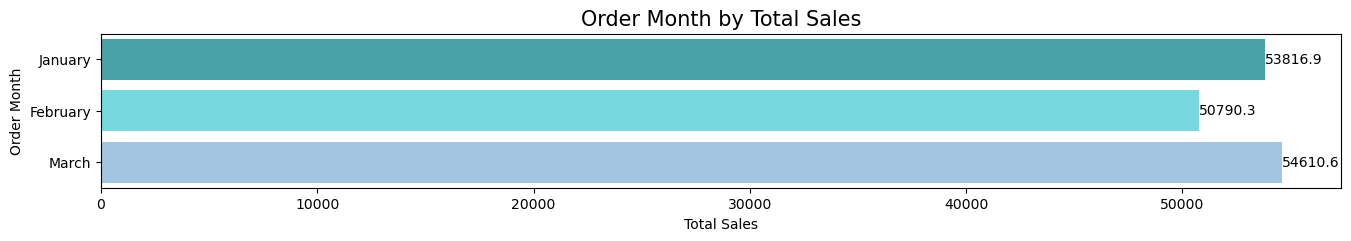

In [63]:
plt.figure(figsize = (16, 2))
cl = ['#3AAFB9', '#64E9EE', '#97C8EB']
bp = sns.barplot(mon_sales, x = 'Total Sales', y = 'Order Month', hue = 'Order Month', legend = False, palette = cl)
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Order Month by Total Sales", fontsize = 15)
plt.xlabel("Total Sales")
plt.ylabel("Order Month")

#### 5. Find Time Section wise Total Sales.

In [65]:
query = '''
SELECT order_section, SUM(Item_Sales) FROM
(
SELECT menu_item_id, item_name, order_section, price AS Price, COUNT(item_id), price * COUNT(item_id) AS Item_Sales
FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY menu_item_id, item_name, order_section
) AS ItemSales
GROUP BY order_section
ORDER BY SUM(Item_Sales) DESC
'''
cur.execute(query)
data = cur.fetchall()
sec_sales = pd.DataFrame(data)
sec_sales.rename(columns = {0:'Order Time Section', 1:'Total Sales'}, inplace = True)
sec_sales

,Order Time Section,Total Sales
0,Lunch,54974.35
1,Happy Hour,48903.60
2,Dinner,23638.55
3,Snack Time,23515.55
4,Brunch,8185.85


Text(0.5, 1.0, 'Order Time Section by Total Sales')

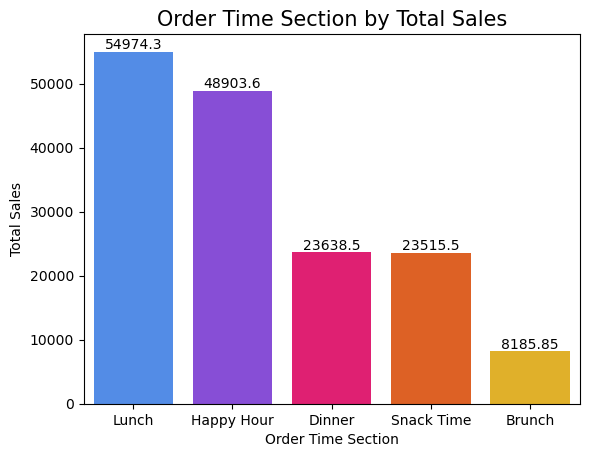

In [66]:
cl = ['#3A86FF', '#8338EC', '#FF006E', '#FB5607', '#FFBE0B']
bp = sns.barplot(sec_sales, x = 'Order Time Section', y = 'Total Sales', hue = 'Order Time Section', legend = False, palette = cl)
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Order Time Section by Total Sales", fontsize = 15)

#### 6. Find the Top 5 least and most ordered/sold Items on the menu with their cuisines.

In [68]:
query = '''
SELECT menu_item_id, item_name, category, price, COUNT(item_id), price * COUNT(item_id)
FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY menu_item_id, item_name
ORDER BY COUNT(item_id) ASC
'''
cur.execute(query)
data = cur.fetchall()
item_sales = pd.DataFrame(data)
item_sales.rename(columns = {0:'Item ID', 1:'Item Name', 2:'Cuisine', 3:'Price', 4:'Total Orders', 5:'Total Sales'}, inplace = True)
item_sales

,Item ID,Item Name,Cuisine,Price,Total Orders,Total Sales
0,115,Chicken Tacos,Mexican,11.95,123,1469.85
1,114,Potstickers,Asian,9.00,205,1845.00
2,128,Cheese Lasagna,Italian,15.50,207,3208.50
3,116,Steak Tacos,Mexican,13.95,214,2985.30
4,121,Cheese Quesadillas,Mexican,10.50,233,2446.50
5,123,Chips & Guacamole,Mexican,9.00,237,2133.00
6,104,Veggie Burger,American,10.50,238,2499.00
7,130,Shrimp Scampi,Italian,19.95,239,4768.05
8,126,Fettuccine Alfredo,Italian,14.50,249,3610.50
9,103,Hot Dog,American,9.00,257,2313.00


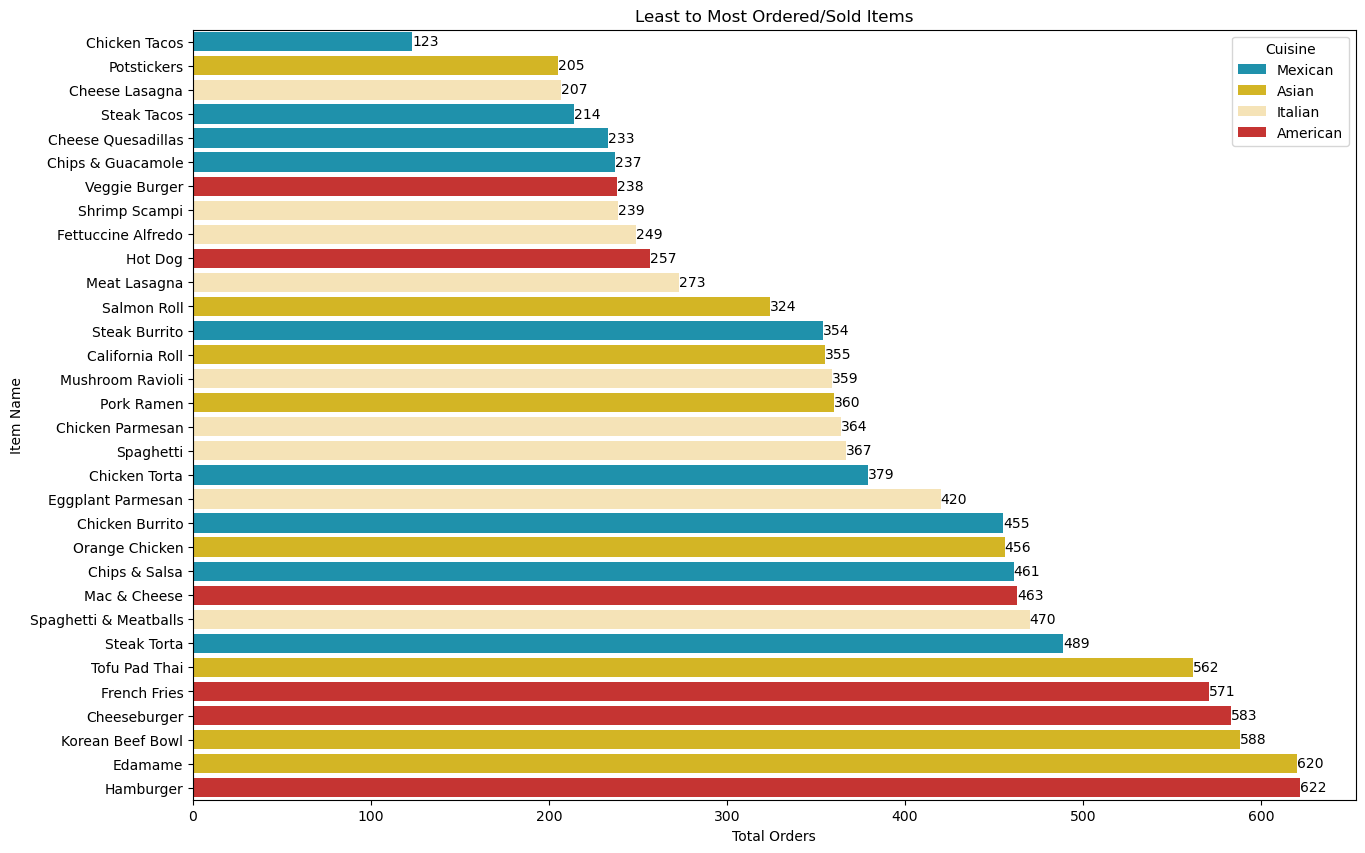

In [69]:
plt.figure(figsize = (15, 10))
plt.title("Least to Most Ordered/Sold Items", fontsize = 12)
cl = ['#07A0C3', '#F0C808', '#FFE7AD', '#DD1C1A']
bp = sns.barplot(item_sales, x = 'Total Orders', y = 'Item Name', hue = 'Cuisine', palette = cl)
for i in bp.containers:
    bp.bar_label(i,)

#### 7. Find Cuisine wise Total Sales.

In [71]:
query = '''
SELECT category, SUM(Item_Sales) FROM
(
SELECT menu_item_id, item_name, category, price, COUNT(item_id), price * COUNT(item_id) AS Item_Sales
FROM order_details od JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY menu_item_id, item_name, category
) AS ItemSales
GROUP BY category
ORDER BY SUM(Item_Sales) DESC
'''
cur.execute(query)
data = cur.fetchall()
cuisine_sales = pd.DataFrame(data)
cuisine_sales.rename(columns = {0:'Cuisine', 1:'Total Sales'}, inplace = True)
cuisine_sales

,Cuisine,Total Sales
0,Italian,49462.70
1,Asian,46720.65
2,Mexican,34796.80
3,American,28237.75


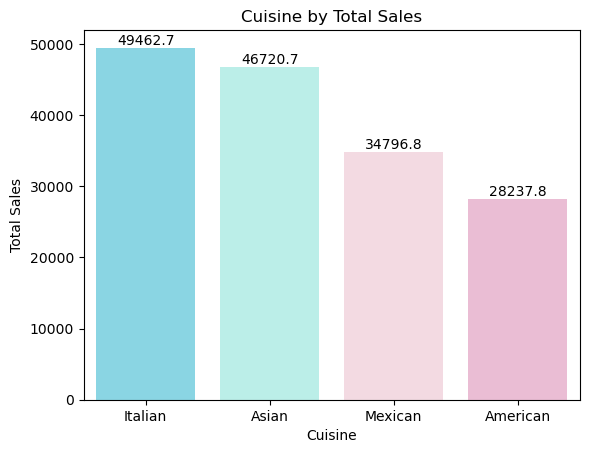

In [72]:
plt.title("Cuisine by Total Sales", fontsize = 12)
cl = ['#7BDFF2', '#B2F7EF', '#F7D6E0', '#F2B5D4']
bp = sns.barplot(cuisine_sales, x = 'Cuisine', y = 'Total Sales', hue = 'Cuisine', palette = cl)
for i in bp.containers:
    bp.bar_label(i,)

#### 8. What were the top 10 orders that spent the most money?

In [74]:
query = '''
SELECT order_id, COUNT(item_id), SUM(price)
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY order_id
ORDER BY SUM(price) DESC
LIMIT 10
'''
cur.execute(query)
data = cur.fetchall()
highest_sales_orders = pd.DataFrame(data)
highest_sales_orders.rename(columns = {0:'Order ID', 1:'Number of Items Ordered', 2:'Total Amount Spent'}, inplace = True)
highest_sales_orders

,Order ID,Number of Items Ordered,Total Amount Spent
0,440,14,192.15
1,2075,13,191.05
2,1957,14,190.10
3,330,14,189.70
4,2675,14,185.10
5,4482,13,184.50
6,1274,13,183.55
7,2188,13,182.65
8,3473,14,182.55
9,3583,13,179.60


#### 9. View the details of the first three highest spend orders.

In [76]:
print("Highest Sales Order Details with Order ID 440")
query = '''
SELECT order_id, item_id, item_name, category, COUNT(item_id), order_date, order_time, order_section, price, price * COUNT(item_id)
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
WHERE order_id = 440
GROUP BY order_id, item_id, item_name, category, price, order_date, order_time, order_section
ORDER BY COUNT(item_id) DESC
'''
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data)
result.rename(columns = { 0:"Order ID", 1:'Item ID', 2:'Item Name', 3:'Cuisine', 4:'Quantity', 5:'Order Date', 6:'Order Time', 7:'Order Time Section', 8:'Price', 9:'Item Total Sales'}, inplace = True)
# Removing 0 days from Order Time column
result['Order Time'] = result['Order Time'].astype(str).str.split(' ').str[-1]
result

Highest Sales Order Details with Order ID 440


,Order ID,Item ID,Item Name,Cuisine,Quantity,Order Date,Order Time,Order Time Section,Price,Item Total Sales
0,440,125,Spaghetti & Meatballs,Italian,2,2023-01-08,12:16:34,Lunch,17.95,35.90
1,440,126,Fettuccine Alfredo,Italian,2,2023-01-08,12:16:34,Lunch,14.50,29.00
2,440,116,Steak Tacos,Mexican,1,2023-01-08,12:16:34,Lunch,13.95,13.95
3,440,103,Hot Dog,American,1,2023-01-08,12:16:34,Lunch,9.00,9.00
4,440,124,Spaghetti,Italian,1,2023-01-08,12:16:34,Lunch,14.50,14.50
5,440,109,Korean Beef Bowl,Asian,1,2023-01-08,12:16:34,Lunch,17.95,17.95
6,440,127,Meat Lasagna,Italian,1,2023-01-08,12:16:34,Lunch,17.95,17.95
7,440,113,Edamame,Asian,1,2023-01-08,12:16:34,Lunch,5.00,5.00
8,440,122,Chips & Salsa,Mexican,1,2023-01-08,12:16:34,Lunch,7.00,7.00
9,440,131,Chicken Parmesan,Italian,1,2023-01-08,12:16:34,Lunch,17.95,17.95


In [77]:
print("Second Highest Sales Order Details with Order ID 2075")
query = '''
SELECT order_id, item_id, item_name, category, COUNT(item_id), order_date, order_time, order_section, price, price * COUNT(item_id)
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
WHERE order_id = 2075
GROUP BY order_id, item_id, item_name, category, price, order_date, order_time, order_section
ORDER BY COUNT(item_id) DESC
'''
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data)
result.rename(columns = { 0:"Order ID", 1:'Item ID', 2:'Item Name', 3:'Cuisine', 4:'Quantity', 5:'Order Date', 6:'Order Time', 7:'Order Time Section', 8:'Price', 9:'Item Total Sales'}, inplace = True)
# Removing 0 days from Order Time column
result['Order Time'] = result['Order Time'].astype(str).str.split(' ').str[-1]
result

Second Highest Sales Order Details with Order ID 2075


,Order ID,Item ID,Item Name,Cuisine,Quantity,Order Date,Order Time,Order Time Section,Price,Item Total Sales
0,2075,132,Eggplant Parmesan,Italian,2,2023-02-04,14:03:04,Lunch,16.95,33.90
1,2075,107,Orange Chicken,Asian,1,2023-02-04,14:03:04,Lunch,16.50,16.50
2,2075,115,Chicken Tacos,Mexican,1,2023-02-04,14:03:04,Lunch,11.95,11.95
3,2075,102,Cheeseburger,American,1,2023-02-04,14:03:04,Lunch,13.95,13.95
4,2075,124,Spaghetti,Italian,1,2023-02-04,14:03:04,Lunch,14.50,14.50
5,2075,125,Spaghetti & Meatballs,Italian,1,2023-02-04,14:03:04,Lunch,17.95,17.95
6,2075,127,Meat Lasagna,Italian,1,2023-02-04,14:03:04,Lunch,17.95,17.95
7,2075,129,Mushroom Ravioli,Italian,1,2023-02-04,14:03:04,Lunch,15.50,15.50
8,2075,111,California Roll,Asian,1,2023-02-04,14:03:04,Lunch,11.95,11.95
9,2075,112,Salmon Roll,Asian,1,2023-02-04,14:03:04,Lunch,14.95,14.95


In [78]:
print("Third Highest Sales Order Details with Order ID 1957")
query = '''
SELECT order_id, item_id, item_name, category, COUNT(item_id), order_date, order_time, order_section, price, price * COUNT(item_id)
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
WHERE order_id = 1957
GROUP BY order_id, item_id, item_name, category, price, order_date, order_time, order_section
ORDER BY COUNT(item_id) DESC
'''
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data)
result.rename(columns = { 0:"Order ID", 1:'Item ID', 2:'Item Name', 3:'Cuisine', 4:'Quantity', 5:'Order Date', 6:'Order Time', 7:'Order Time Section', 8:'Price', 9:'Item Total Sales'}, inplace = True)
# Removing 0 days from Order Time column
result['Order Time'] = result['Order Time'].astype(str).str.split(' ').str[-1]
result

Third Highest Sales Order Details with Order ID 1957


,Order ID,Item ID,Item Name,Cuisine,Quantity,Order Date,Order Time,Order Time Section,Price,Item Total Sales
0,1957,118,Steak Burrito,Mexican,2,2023-02-02,14:50:01,Lunch,14.95,29.90
1,1957,131,Chicken Parmesan,Italian,2,2023-02-02,14:50:01,Lunch,17.95,35.90
2,1957,132,Eggplant Parmesan,Italian,2,2023-02-02,14:50:01,Lunch,16.95,33.90
3,1957,107,Orange Chicken,Asian,1,2023-02-02,14:50:01,Lunch,16.50,16.50
4,1957,103,Hot Dog,American,1,2023-02-02,14:50:01,Lunch,9.00,9.00
5,1957,104,Veggie Burger,American,1,2023-02-02,14:50:01,Lunch,10.50,10.50
6,1957,126,Fettuccine Alfredo,Italian,1,2023-02-02,14:50:01,Lunch,14.50,14.50
7,1957,117,Chicken Burrito,Mexican,1,2023-02-02,14:50:01,Lunch,12.95,12.95
8,1957,112,Salmon Roll,Asian,1,2023-02-02,14:50:01,Lunch,14.95,14.95
9,1957,113,Edamame,Asian,1,2023-02-02,14:50:01,Lunch,5.00,5.00


#### 10. How much money the middle 100 orders spent?

In [80]:
query = '''
SELECT order_id, COUNT(item_id), order_month, order_time, order_section, SUM(price)
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY order_id, order_month, order_time, order_section
ORDER BY SUM(price) DESC
LIMIT 100 OFFSET 2635; 
'''
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data)
result.rename(columns = { 0:"Order ID", 1:'Number of Items Ordered', 2:'Order Month', 3:'Order Time', 4:'Order Time Section', 5:'Total Amount Spent'}, inplace = True)
# Removing 0 days from Order Time column
result['Order Time'] = result['Order Time'].astype(str).str.split(' ').str[-1]
result

,Order ID,Number of Items Ordered,Order Month,Order Time,Order Time Section,Total Amount Spent
0,2539,2,February,11:38:35,Brunch,24.95
1,2643,2,February,20:08:34,Dinner,24.95
2,2804,2,February,16:43:53,Snack Time,24.95
3,2807,2,February,17:13:02,Happy Hour,24.95
4,2819,2,February,19:26:51,Happy Hour,24.95
...,...,...,...,...,...,...
95,1529,2,January,15:35:32,Snack Time,23.95
96,1652,2,January,16:56:19,Snack Time,23.95
97,1758,2,January,17:38:25,Happy Hour,23.95
98,1788,2,January,21:35:08,Dinner,23.95


#### 11. What were the top 10 orders that spent the least money?

In [82]:
query = '''
SELECT order_id, COUNT(item_id), SUM(price)
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY order_id
ORDER BY SUM(price) ASC
LIMIT 10
'''
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data)
result.rename(columns = { 0:"Order ID", 1:'Number of Items Ordered', 2:'Total Amount Spent'}, inplace = True)
result

,Order ID,Number of Items Ordered,Total Amount Spent
0,349,1,5.00
1,150,1,5.00
2,371,1,5.00
3,211,1,5.00
4,112,1,5.00
5,132,1,5.00
6,84,1,5.00
7,127,1,5.00
8,398,1,5.00
9,259,1,5.00


#### 12. What is the average amount earned from an order?

In [84]:
query = '''
SELECT ROUND(AVG(OrderAmt),2) AS "Average Sales" FROM
(
SELECT order_id, COUNT(item_id), SUM(price) AS OrderAmt
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY order_id
) AS OrderSales
'''
cur.execute(query)
data = cur.fetchall()
avg_sales = float(*([d[0] for d in data]))
print(f"Average Sales made on an Order is {avg_sales}.")

Average Sales made on an Order is 29.8.


#### 13. Calculate cumulative sales over 3 months.

In [86]:
query = '''
WITH Monthly_Sales AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, SUM(price) Monthsales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthsales, SUM(Monthsales) OVER(ORDER BY Monthnum)
FROM Monthly_Sales
'''
cur.execute(query)
data = cur.fetchall()
cum_sales = pd.DataFrame(data)
cum_sales.rename(columns = {0:'Order Month', 1:'Total Sales', 2:'Cumulative Sales'}, inplace = True)
cum_sales

,Order Month,Total Sales,Cumulative Sales
0,January,53816.95,53816.95
1,February,50790.35,104607.30
2,March,54610.60,159217.90


#### 14. Calculate month over month growth rate of total sales. Also, find contribution % of monthly sales towards total sales.

In [88]:
query = '''
WITH Monthly_Sales AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, SUM(price) Monthsales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthsales, 
CONCAT(ROUND(((Monthsales-LAG(Monthsales,1) OVER(ORDER BY Monthnum))/LAG(Monthsales,1) OVER(ORDER BY Monthnum)) * 100, 1), '%'),
CONCAT(ROUND((Monthsales/(SELECT SUM(Monthsales) FROM Monthly_Sales)) * 100, 1), '%')
FROM Monthly_Sales
'''
cur.execute(query)
data = cur.fetchall()
mom_sales = pd.DataFrame(data)
mom_sales.rename(columns = {0:'Order Month', 1:'Total Sales', 2:'MoM Sales Growth Rate', 3:'Total Sales Contribution %'}, inplace = True)
mom_sales

,Order Month,Total Sales,MoM Sales Growth Rate,Total Sales Contribution %
0,January,53816.95,None,33.8%
1,February,50790.35,-5.6%,31.9%
2,March,54610.60,7.5%,34.3%


([<matplotlib.patches.Wedge at 0x26e0020da90>,
 [Text(0.5359505868140616, 0.9606023987548975, 'January'),
  Text(-1.0998651229802545, 0.017225308462540834, 'February'),
  Text(0.5208423506045956, -0.9688773120559072, 'March')],
 [Text(0.29233668371676086, 0.5239649447753986, '33.8%'),
  Text(-0.5999264307165024, 0.009395622797749545, '31.9%'),
  Text(0.2840958276025066, -0.5284785338486766, '34.3%')])

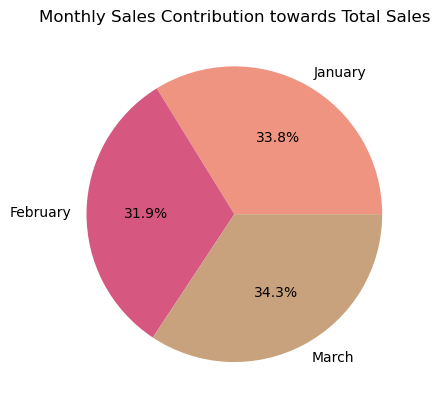

In [89]:
plt.title("Monthly Sales Contribution towards Total Sales")
cl = ['#EE9480', '#D65780', '#C7A27C']
plt.pie(mom_sales['Total Sales'], labels = mom_sales['Order Month'], autopct='%1.1f%%', colors = cl)

#### 15. Calculate moving average of monthly sales.

In [91]:
query = '''
WITH Monthly_Sales AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, SUM(price) Monthsales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthsales, ROUND(AVG(Monthsales) OVER(ORDER BY Monthnum), 2)
FROM Monthly_Sales
'''
cur.execute(query)
data = cur.fetchall()
mov_avg = pd.DataFrame(data)
mov_avg.rename(columns = {0:'Order Month', 1:'Total Sales', 2:'Moving Average'}, inplace = True)
mov_avg

,Order Month,Total Sales,Moving Average
0,January,53816.95,53816.95
1,February,50790.35,52303.65
2,March,54610.60,53072.63


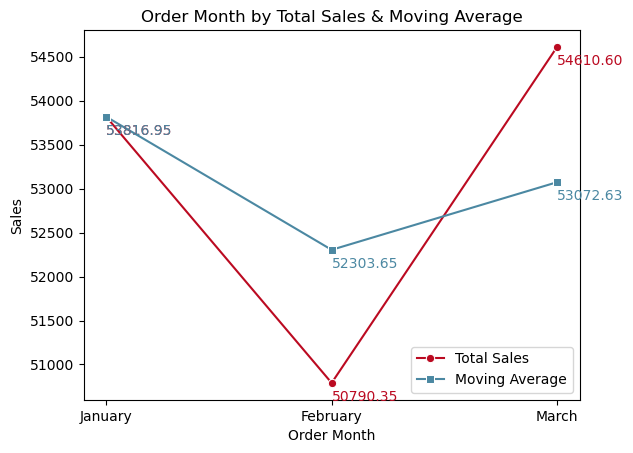

In [92]:
sns.lineplot(x = 'Order Month', y = 'Total Sales', data = mov_avg, marker = 'o', color = '#BB0A21', label = 'Total Sales')
for a, b in zip(mov_avg['Order Month'], mov_avg['Total Sales']):
 plt.text(x = a, y = b - 200, s = b, color = '#BB0A21')
sns.lineplot(x = 'Order Month', y = 'Moving Average', data = mov_avg, marker = 's', color = '#4B88A2', label = 'Moving Average')
for a, b in zip(mov_avg['Order Month'], mov_avg['Moving Average']):
 plt.text(x = a, y = b - 200, s = b, color = '#4B88A2')
plt.title("Order Month by Total Sales & Moving Average")
plt.ylabel("Sales") 
plt.legend(loc = "lower right")

#### 16. Calculate month over month sales difference.

In [94]:
query = '''
WITH Monthly_Sales AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, SUM(price) Monthsales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthsales, LAG(Monthsales) OVER(ORDER BY Monthnum), 
Monthsales - LAG(Monthsales) OVER(ORDER BY Monthnum),
CONCAT(ROUND(((Monthsales - LAG(Monthsales) OVER(ORDER BY Monthnum)) / Monthsales) * 100, 0), '%')
FROM Monthly_Sales
'''
cur.execute(query)
data = cur.fetchall()
mom_sales_diff = pd.DataFrame(data)
mom_sales_diff.rename(columns = {0:'Order Month', 1:'Total Sales', 2:'Previous Month Sales', 3:'Sales Difference', 4:'Sales Difference %'}, inplace = True)
mom_sales_diff

,Order Month,Total Sales,Previous Month Sales,Sales Difference,Sales Difference %
0,January,53816.95,None,None,None
1,February,50790.35,53816.95,-3026.60,-6%
2,March,54610.60,50790.35,3820.25,7%


#### 17. Calculate cumulative orders over 3 months.

In [96]:
query = '''
WITH Monthly_Orders AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, COUNT(DISTINCT order_id) Monthorders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthorders, SUM(Monthorders) OVER(ORDER BY Monthnum)
FROM Monthly_Orders
'''
cur.execute(query)
data = cur.fetchall()
cum_orders = pd.DataFrame(data)
cum_orders.rename(columns = {0:'Order Month', 1:'Total Orders', 2:'Cumulative Orders'}, inplace = True)
cum_orders

,Order Month,Total Orders,Cumulative Orders
0,January,1835,1835
1,February,1675,3510
2,March,1833,5343


#### 18. Calculate month over month growth rate of total orders. Also, find contribution % of monthly orders towards total orders.

In [98]:
query = '''
WITH Monthly_Orders AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, COUNT(DISTINCT order_id) Monthorders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthorders, 
CONCAT(ROUND(((Monthorders-LAG(Monthorders,1) OVER(ORDER BY Monthnum))/LAG(Monthorders,1) OVER(ORDER BY Monthnum)) * 100, 1), '%'),
CONCAT(ROUND((Monthorders/(SELECT SUM(Monthorders) FROM Monthly_Orders)) * 100, 2), '%')
FROM Monthly_Orders
'''
cur.execute(query)
data = cur.fetchall()
mom_orders = pd.DataFrame(data)
mom_orders.rename(columns = {0:'Order Month', 1:'Total Orders', 2:'MoM Orders Growth Rate', 3:'Total Orders Contribution %'}, inplace = True)
mom_orders

,Order Month,Total Orders,MoM Orders Growth Rate,Total Orders Contribution %
0,January,1835,None,34.34%
1,February,1675,-8.7%,31.35%
2,March,1833,9.4%,34.31%


([<matplotlib.patches.Wedge at 0x26e00a49eb0>,
 [Text(0.5194808724573736, 0.969607973951806, 'January'),
  Text(-1.0999992393041749, -0.0012936499669504121, 'February'),
  Text(0.5206208162360342, -0.9689963703243297, 'March')],
 [Text(0.2833532031585674, 0.528877076700985, '34.34%'),
  Text(-0.5999995850750044, -0.0007056272547002248, '31.35%'),
  Text(0.28397499067420046, -0.5285434747223616, '34.31%')])

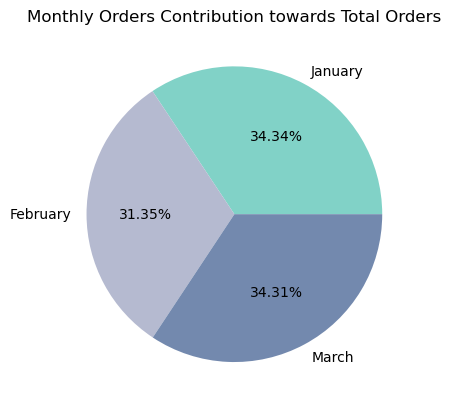

In [99]:
plt.title("Monthly Orders Contribution towards Total Orders")
cl = ['#81D2C7', '#B5BAD0', '#7389AE']
plt.pie(mom_orders['Total Orders'], labels = mom_orders['Order Month'], autopct='%1.2f%%', colors = cl)

#### 19. Calculate moving average of monthly orders.

In [101]:
query = '''
WITH Monthly_Orders AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, COUNT(DISTINCT order_id) Monthorders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthorders, ROUND(AVG(Monthorders) OVER(ORDER BY Monthnum), 2)
FROM Monthly_Orders
'''
cur.execute(query)
data = cur.fetchall()
mov_avg = pd.DataFrame(data)
mov_avg.rename(columns = {0:'Order Month', 1:'Total Orders', 2:'Moving Average'}, inplace = True)
mov_avg

,Order Month,Total Orders,Moving Average
0,January,1835,1835.00
1,February,1675,1755.00
2,March,1833,1781.00


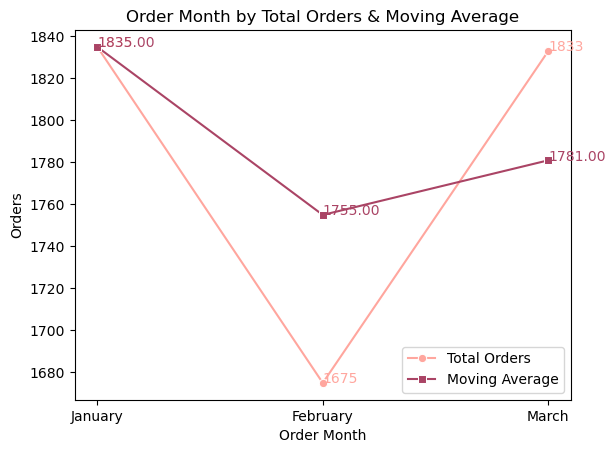

In [102]:
sns.lineplot(x = 'Order Month', y = 'Total Orders', data = mov_avg, marker = 'o', color = '#FFA69E', label = 'Total Orders')
for a, b in zip(mov_avg['Order Month'], mov_avg['Total Orders']):
 plt.text(x = a, y = b, s = b, color = '#FFA69E')
sns.lineplot(x = 'Order Month', y = 'Moving Average', data = mov_avg, marker = 's', color = '#AA4465', label = 'Moving Average')
for a, b in zip(mov_avg['Order Month'], mov_avg['Moving Average']):
 plt.text(x = a, y = b, s = b, color = '#AA4465')
plt.title("Order Month by Total Orders & Moving Average")
plt.ylabel("Orders") 
plt.legend(loc = "lower right")

#### 20. Calculate month over month orders difference.

In [104]:
query = '''
WITH Monthly_Orders AS (SELECT MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, COUNT(DISTINCT order_id) Monthorders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Monthnum, Monthname
ORDER BY Monthnum) 
SELECT Monthname, Monthorders, LAG(Monthorders) OVER(ORDER BY Monthnum), 
Monthorders - LAG(Monthorders) OVER(ORDER BY Monthnum),
CONCAT(ROUND(((Monthorders - LAG(Monthorders) OVER(ORDER BY Monthnum)) / Monthorders) * 100, 0), '%')
FROM Monthly_Orders
'''
cur.execute(query)
data = cur.fetchall()
mom_sales_diff = pd.DataFrame(data)
mom_sales_diff.rename(columns = {0:'Order Month', 1:'Total Orders', 2:'Previous Month Orders', 3:'Orders Difference', 4:'Orders Difference %'}, inplace = True)
mom_sales_diff

,Order Month,Total Orders,Previous Month Orders,Orders Difference,Orders Difference %
0,January,1835,NaN,NaN,None
1,February,1675,1835.0,-160.0,-10%
2,March,1833,1675.0,158.0,9%


#### 21. Rank cuisines from highest to lowest based on their total sales. Also, calculate their contribution percentage towards total sales.

In [106]:
query = '''
WITH CS AS (SELECT category Cuisine, SUM(price) Sales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Cuisine
ORDER BY Cuisine) 
SELECT DENSE_RANK() OVER(ORDER BY Sales DESC), Cuisine, Sales,
CONCAT(ROUND((Sales/(SELECT SUM(Sales) FROM CS)) * 100, 0), '%')
FROM CS
'''
cur.execute(query)
data = cur.fetchall()
cuisales = pd.DataFrame(data)
cuisales.rename(columns = {0:'Rank', 1:'Cuisine', 2:'Total Sales', 3:'Total Sales Contribution %'}, inplace = True)
cuisales

,Rank,Cuisine,Total Sales,Total Sales Contribution %
0,1,Italian,49462.70,31%
1,2,Asian,46720.65,29%
2,3,Mexican,34796.80,22%
3,4,American,28237.75,18%


([<matplotlib.patches.Wedge at 0x26e01ccdf70>,
 [Text(0.6164027782062701, 0.9110694896766065, 'Italian'),
  Text(-1.0607933476630118, 0.2910626625898641, 'Asian'),
  Text(-0.2509189501057562, -1.0709993839763987, 'Mexican'),
  Text(0.9336303484451953, -0.5816651721240522, 'American')],
 [Text(0.33621969720342, 0.496946994369058, '31.07%'),
  Text(-0.5786145532707336, 0.15876145232174402, '29.34%'),
  Text(-0.136864881875867, -0.5841814821689446, '21.85%'),
  Text(0.5092529173337428, -0.3172719120676648, '17.74%')])

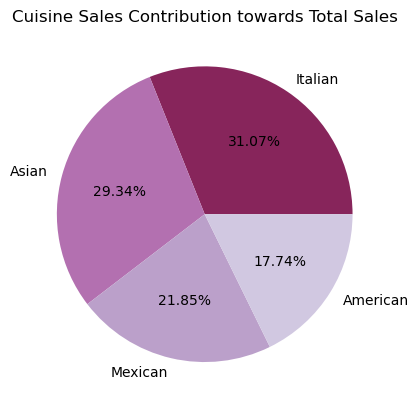

In [107]:
plt.title("Cuisine Sales Contribution towards Total Sales")
cl = ['#87255B', '#B370B0', '#BBA0CA', '#D1C8E1']
plt.pie(cuisales['Total Sales'], labels = cuisales['Cuisine'], autopct='%1.2f%%', colors = cl)

#### 22. Rank items from highest to lowest based on their total sales. Also, calculate their contribution percentage towards total sales.

In [109]:
query = '''
WITH ITS AS (SELECT item_id IID, item_name ITN, category Cuisine, SUM(price) Sales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY IID, ITN
ORDER BY IID) 
SELECT DENSE_RANK() OVER(ORDER BY Sales DESC), IID, ITN , Cuisine, Sales,
CONCAT(ROUND((Sales/(SELECT SUM(Sales) FROM ITS)) * 100, 0), '%')
FROM ITS
'''
cur.execute(query)
data = cur.fetchall()
itsales = pd.DataFrame(data)
itsales.rename(columns = {0:'Rank', 1:'Item ID', 2:'Item Name', 3:'Cuisine', 4:'Total Sales', 5:'Total Sales Contribution %'}, inplace = True)
itsales

,Rank,Item ID,Item Name,Cuisine,Total Sales,Total Sales Contribution %
0,1,109,Korean Beef Bowl,Asian,10554.60,7%
1,2,125,Spaghetti & Meatballs,Italian,8436.50,5%
2,3,108,Tofu Pad Thai,Asian,8149.00,5%
3,4,102,Cheeseburger,American,8132.85,5%
4,5,101,Hamburger,American,8054.90,5%
5,6,107,Orange Chicken,Asian,7524.00,5%
6,7,132,Eggplant Parmesan,Italian,7119.00,4%
7,8,120,Steak Torta,Mexican,6821.55,4%
8,9,131,Chicken Parmesan,Italian,6533.80,4%
9,10,110,Pork Ramen,Asian,6462.00,4%


Text(0.5, 1.0, 'Items from Lowest to Highest based on Total Sales')

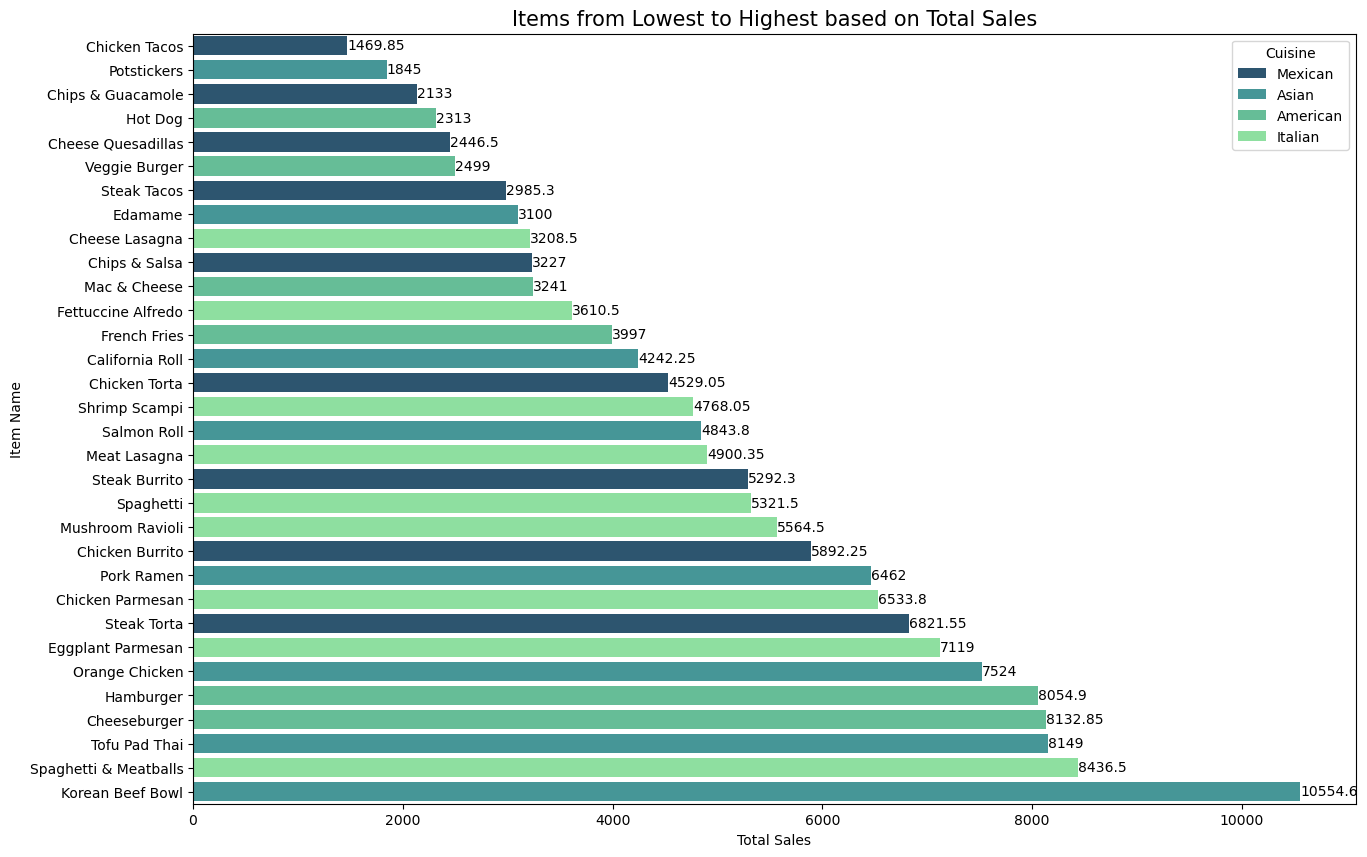

In [110]:
plt.figure(figsize = (15, 10))
cl = ['#22577A', '#38A3A5', '#57CC99', '#80ED99']
bp = sns.barplot(itsales.sort_values(by = 'Total Sales'), x = 'Total Sales', y = 'Item Name', hue = 'Cuisine', palette = cl)
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Items from Lowest to Highest based on Total Sales", fontsize = 15)

#### 23. Rank cuisines from highest to lowest based on their total orders. Also, calculate their contribution percentage towards total orders.

In [112]:
query = '''
WITH CO AS (SELECT category Cuisine, COUNT(order_id) Orders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Cuisine
ORDER BY Cuisine) 
SELECT DENSE_RANK() OVER(ORDER BY Orders DESC), Cuisine, Orders,
CONCAT(ROUND((Orders/(SELECT SUM(Orders) FROM CO)) * 100, 0), '%')
FROM CO
'''
cur.execute(query)
data = cur.fetchall()
cuiorders = pd.DataFrame(data)
cuiorders.rename(columns = {0:'Rank', 1:'Cuisine', 2:'Total Orders', 3:'Total Orders Contribution %'}, inplace = True)
cuiorders

,Rank,Cuisine,Total Orders,Total Orders Contribution %
0,1,Asian,3470,29%
1,2,Italian,2948,24%
2,3,Mexican,2945,24%
3,4,American,2734,23%


([<matplotlib.patches.Wedge at 0x26e01ec1cd0>,
 [Text(0.6827714087910295, 0.8624518556635571, 'Italian'),
  Text(-0.9239017870658592, 0.5969970584990448, 'Asian'),
  Text(-0.633810459170529, -0.8990463290876858, 'Mexican'),
  Text(0.8341835814329575, -0.7170339967307578, 'American')],
 [Text(0.3724207684314706, 0.47042828490739474, '28.68%'),
  Text(-0.5039464293086504, 0.32563475918129714, '24.37%'),
  Text(-0.3457147959111976, -0.4903889067751013, '24.34%'),
  Text(0.4550092262361586, -0.3911094527622315, '22.60%')])

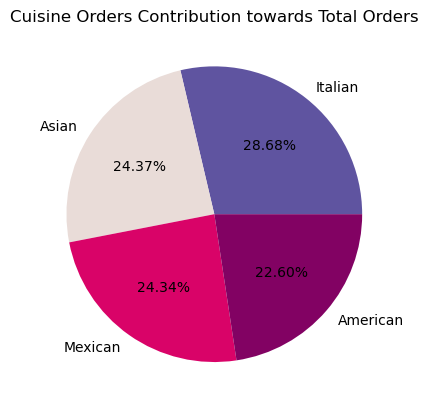

In [113]:
plt.title("Cuisine Orders Contribution towards Total Orders")
cl = ['#5F54A0', '#E9DCD8', '#D90368', '#820263']
plt.pie(cuiorders['Total Orders'], labels = cuisales['Cuisine'], autopct='%1.2f%%', colors = cl)

#### 24. Rank items from highest to lowest based on their total orders. Also, calculate their contribution percentage towards total orders.

In [115]:
query = '''
WITH ITO AS (SELECT item_id IID, item_name ITN, category Cuisine, COUNT(order_id) Orders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY IID, ITN
ORDER BY IID) 
SELECT DENSE_RANK() OVER(ORDER BY orders DESC), IID, ITN, Cuisine, Orders,
CONCAT(ROUND((Orders/(SELECT SUM(Orders) FROM ITO)) * 100, 0), '%')
FROM ITO
'''
cur.execute(query)
data = cur.fetchall()
itorders = pd.DataFrame(data)
itorders.rename(columns = {0:'Rank', 1:'Item ID', 2:'Item Name', 3:'Cuisine', 4:'Total Orders', 5:'Total Orders Contribution %'}, inplace = True)
itorders

,Rank,Item ID,Item Name,Cuisine,Total Orders,Total Orders Contribution %
0,1,101,Hamburger,American,622,5%
1,2,113,Edamame,Asian,620,5%
2,3,109,Korean Beef Bowl,Asian,588,5%
3,4,102,Cheeseburger,American,583,5%
4,5,106,French Fries,American,571,5%
5,6,108,Tofu Pad Thai,Asian,562,5%
6,7,120,Steak Torta,Mexican,489,4%
7,8,125,Spaghetti & Meatballs,Italian,470,4%
8,9,105,Mac & Cheese,American,463,4%
9,10,122,Chips & Salsa,Mexican,461,4%


Text(0.5, 1.0, 'Items from Lowest to Highest based on Total Orders')

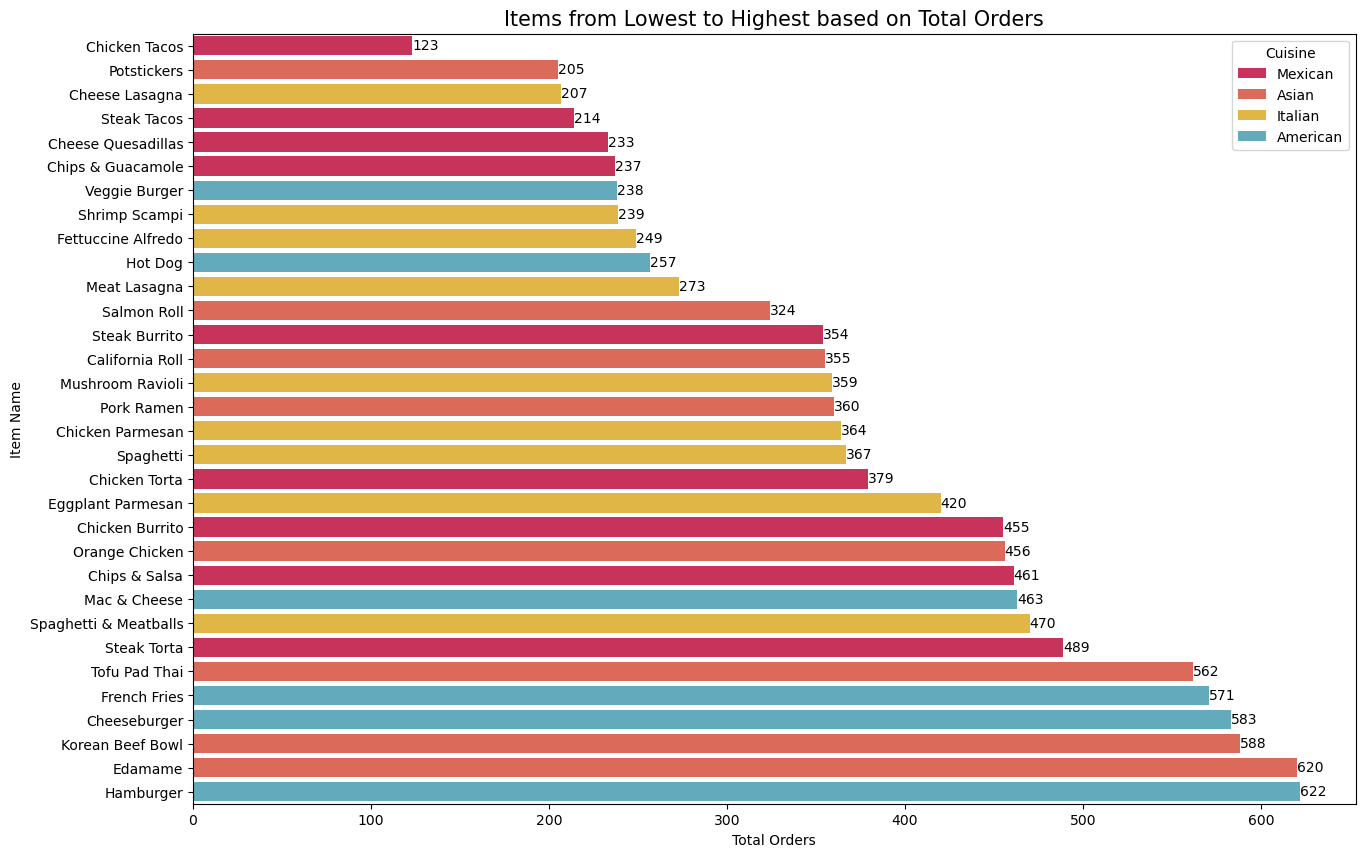

In [116]:
plt.figure(figsize = (15, 10))
cl = ['#E01A4F', '#F15946', '#F9C22E', '#53B3CB']
bp = sns.barplot(itorders.sort_values(by = 'Total Orders'), x = 'Total Orders', y = 'Item Name', hue = 'Cuisine', palette = cl)
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Items from Lowest to Highest based on Total Orders", fontsize = 15)

#### 25. Analyze sales changes over the months for all cuisines.

In [118]:
query = '''
WITH CMS AS (SELECT category Cuisine, MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, SUM(price) Monthsales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Cuisine, Monthnum, Monthname
ORDER BY Cuisine) 
SELECT Cuisine, Monthname, Monthsales, 
SUM(Monthsales) OVER(PARTITION BY Cuisine ORDER BY Monthnum),
CONCAT(ROUND(((Monthsales-LAG(Monthsales,1) OVER(PARTITION BY Cuisine ORDER BY Monthnum))/LAG(Monthsales,1) OVER(PARTITION BY Cuisine ORDER BY Monthnum)) * 100, 2), '%'),
CONCAT(ROUND((Monthsales/(SELECT SUM(Monthsales) FROM CMS)) * 100, 1), '%'),
ROUND(AVG(Monthsales) OVER(PARTITION BY Cuisine ORDER BY Monthnum), 2),
LAG(Monthsales) OVER(PARTITION BY Cuisine ORDER BY Monthnum), 
Monthsales - LAG(Monthsales) OVER(PARTITION BY Cuisine ORDER BY Monthnum),
CONCAT(ROUND(((Monthsales - LAG(Monthsales) OVER(PARTITION BY Cuisine ORDER BY Monthnum)) / Monthsales) * 100, 2), '%')
FROM CMS
'''
cur.execute(query)
data = cur.fetchall()
cuisa = pd.DataFrame(data)
cuisa.rename(columns = {0:'Cuisine', 1:'Order Month', 2:'Total Monthly Sales', 3:'Cumulative Sales', 4:'MoM Sales Growth Rate', 5:'Contribution %', 6:'Moving Average Sales', 7:'Previous Month Sales', 8:'Sales Difference', 9:'Sales Difference %'}, inplace = True)
cuisa

,Cuisine,Order Month,Total Monthly Sales,Cumulative Sales,MoM Sales Growth Rate,Contribution %,Moving Average Sales,Previous Month Sales,Sales Difference,Sales Difference %
0,American,January,9284.85,9284.85,None,5.8%,9284.85,None,None,None
1,American,February,8947.15,18232.00,-3.64%,5.6%,9116.00,9284.85,-337.70,-3.77%
2,American,March,10005.75,28237.75,11.83%,6.3%,9412.58,8947.15,1058.60,10.58%
3,Asian,January,15588.50,15588.50,None,9.8%,15588.50,None,None,None
4,Asian,February,15075.70,30664.20,-3.29%,9.5%,15332.10,15588.50,-512.80,-3.40%
5,Asian,March,16056.45,46720.65,6.51%,10.1%,15573.55,15075.70,980.75,6.11%
6,Italian,January,16727.75,16727.75,None,10.5%,16727.75,None,None,None
7,Italian,February,15545.05,32272.80,-7.07%,9.8%,16136.40,16727.75,-1182.70,-7.61%
8,Italian,March,17189.90,49462.70,10.58%,10.8%,16487.57,15545.05,1644.85,9.57%
9,Mexican,January,12215.85,12215.85,None,7.7%,12215.85,None,None,None


Text(0.5, 1.0, 'Cuisine by Monthly Sales')

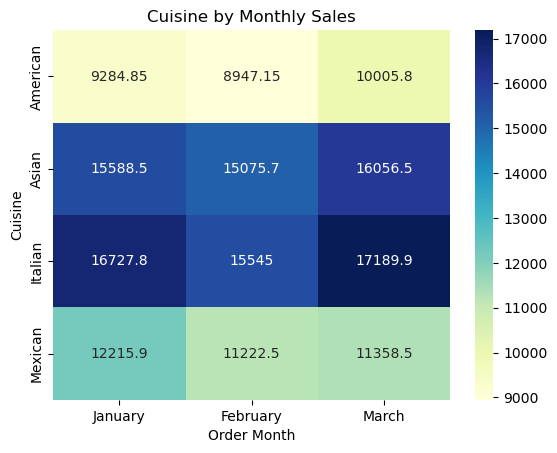

In [119]:
x = cuisa.pivot_table(index = 'Cuisine', columns = 'Order Month', values = 'Total Monthly Sales', aggfunc = 'sum')
x = x.reindex(['January','February', 'March'], axis = 1)
sns.heatmap(x.astype('float'), annot = True, cmap = 'YlGnBu',  fmt = 'g')
plt.title("Cuisine by Monthly Sales")

#### 26. Analyze sales changes over the months for all items.

In [121]:
query = '''
WITH IMS AS (SELECT item_id IID, item_name ITN, MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, SUM(price) Monthsales
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY IID, ITN, Monthnum, Monthname
ORDER BY IID) 
SELECT IID, ITN, Monthname, Monthsales, 
SUM(Monthsales) OVER(PARTITION BY IID ORDER BY Monthnum),
CONCAT(ROUND(((Monthsales-LAG(Monthsales,1) OVER(PARTITION BY IID ORDER BY Monthnum))/LAG(Monthsales,1) OVER(PARTITION BY IID ORDER BY Monthnum)) * 100, 2), '%'),
CONCAT(ROUND((Monthsales/(SELECT SUM(Monthsales) FROM IMS)) * 100, 2), '%'),
ROUND(AVG(Monthsales) OVER(PARTITION BY IID ORDER BY Monthnum), 2),
LAG(Monthsales) OVER(PARTITION BY IID ORDER BY Monthnum), 
Monthsales - LAG(Monthsales) OVER(PARTITION BY IID ORDER BY Monthnum),
CONCAT(ROUND(((Monthsales - LAG(Monthsales) OVER(PARTITION BY IID ORDER BY Monthnum)) / Monthsales) * 100, 2), '%')
FROM IMS
'''
cur.execute(query)
data = cur.fetchall()
itsa = pd.DataFrame(data)
itsa.rename(columns = {0:'Item ID', 1:'Item Name', 2:'Order Month', 3:'Total Monthly Sales', 4:'Cumulative Sales', 5:'MoM Sales Growth Rate', 6:'Contribution %', 7:'Moving Average Sales', 8:'Previous Month Sales', 9:'Sales Difference', 10:'Sales Difference %'}, inplace = True)
itsa

,Item ID,Item Name,Order Month,Total Monthly Sales,Cumulative Sales,MoM Sales Growth Rate,Contribution %,Moving Average Sales,Previous Month Sales,Sales Difference,Sales Difference %
0,101,Hamburger,January,2667.70,2667.70,None,1.68%,2667.70,None,None,None
1,101,Hamburger,February,2421.65,5089.35,-9.22%,1.52%,2544.68,2667.70,-246.05,-10.16%
2,101,Hamburger,March,2965.55,8054.90,22.46%,1.86%,2684.97,2421.65,543.90,18.34%
3,102,Cheeseburger,January,2748.15,2748.15,None,1.73%,2748.15,None,None,None
4,102,Cheeseburger,February,2790.00,5538.15,1.52%,1.75%,2769.08,2748.15,41.85,1.50%
...,...,...,...,...,...,...,...,...,...,...,...
91,131,Chicken Parmesan,February,1920.65,4128.50,-13.01%,1.21%,2064.25,2207.85,-287.20,-14.95%
92,131,Chicken Parmesan,March,2405.30,6533.80,25.23%,1.51%,2177.93,1920.65,484.65,20.15%
93,132,Eggplant Parmesan,January,2423.85,2423.85,None,1.52%,2423.85,None,None,None
94,132,Eggplant Parmesan,February,2356.05,4779.90,-2.80%,1.48%,2389.95,2423.85,-67.80,-2.88%


Text(0.5, 1.0, 'Items by Monthly Sales')

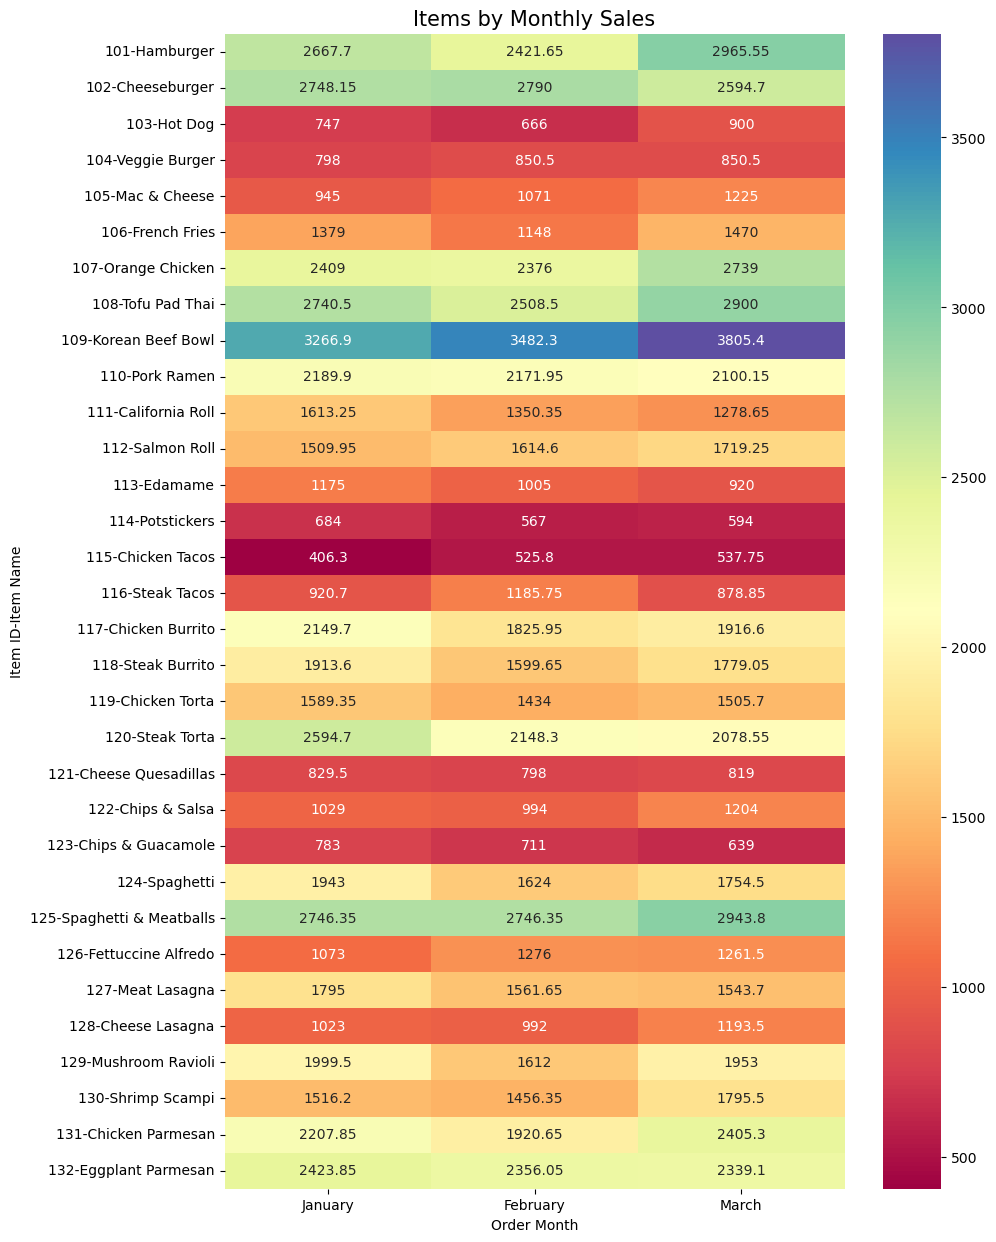

In [122]:
plt.figure(figsize = (10, 15))
x = itsa.pivot_table(index = ['Item ID','Item Name'], columns = 'Order Month', values = 'Total Monthly Sales', aggfunc = 'sum')
x = x.reindex(['January','February', 'March'], axis = 1)
sns.heatmap(x.astype('float'), annot = True, cmap = 'Spectral',  fmt = 'g')
plt.title("Items by Monthly Sales", fontsize = 15)

#### 27. Analyze order changes over the months for all cuisines.

In [124]:
query = '''
WITH CMO AS (SELECT category Cuisine, MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, COUNT(order_id) Monthorders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY Cuisine, Monthnum, Monthname
ORDER BY Cuisine) 
SELECT Cuisine, Monthname, Monthorders, 
SUM(Monthorders) OVER(PARTITION BY Cuisine ORDER BY Monthnum),
CONCAT(ROUND(((Monthorders-LAG(Monthorders,1) OVER(PARTITION BY Cuisine ORDER BY Monthnum))/LAG(Monthorders,1) OVER(PARTITION BY Cuisine ORDER BY Monthnum)) * 100, 2), '%'),
CONCAT(ROUND((Monthorders/(SELECT SUM(Monthorders) FROM CMO)) * 100, 1), '%'),
ROUND(AVG(Monthorders) OVER(PARTITION BY Cuisine ORDER BY Monthnum), 2),
LAG(Monthorders) OVER(PARTITION BY Cuisine ORDER BY Monthnum), 
Monthorders - LAG(Monthorders) OVER(PARTITION BY Cuisine ORDER BY Monthnum),
CONCAT(ROUND(((Monthorders - LAG(Monthorders) OVER(PARTITION BY Cuisine ORDER BY Monthnum)) / Monthorders) * 100, 2), '%')
FROM CMO
'''
cur.execute(query)
data = cur.fetchall()
cuioa = pd.DataFrame(data)
cuioa.rename(columns = {0:'Cuisine', 1:'Order Month', 2:'Total Monthly Orders', 3:'Cumulative Orders', 4:'MoM Orders Growth Rate', 5:'Contribution %', 6:'Moving Average Orders', 7:'Previous Month Orders', 8:'Orders Difference', 9:'Orders Difference %'}, inplace = True)
cuioa

,Cuisine,Order Month,Total Monthly Orders,Cumulative Orders,MoM Orders Growth Rate,Contribution %,Moving Average Orders,Previous Month Orders,Orders Difference,Orders Difference %
0,American,January,894,894,None,7.4%,894.00,NaN,NaN,None
1,American,February,859,1753,-3.91%,7.1%,876.50,894.0,-35.0,-4.07%
2,American,March,981,2734,14.20%,8.1%,911.33,859.0,122.0,12.44%
3,Asian,January,1186,1186,None,9.8%,1186.00,NaN,NaN,None
4,Asian,February,1117,2303,-5.82%,9.2%,1151.50,1186.0,-69.0,-6.18%
5,Asian,March,1167,3470,4.48%,9.6%,1156.67,1117.0,50.0,4.28%
6,Italian,January,998,998,None,8.2%,998.00,NaN,NaN,None
7,Italian,February,927,1925,-7.11%,7.7%,962.50,998.0,-71.0,-7.66%
8,Italian,March,1023,2948,10.36%,8.5%,982.67,927.0,96.0,9.38%
9,Mexican,January,1026,1026,None,8.5%,1026.00,NaN,NaN,None


Text(0.5, 1.0, 'Cuisine by Monthly Orders')

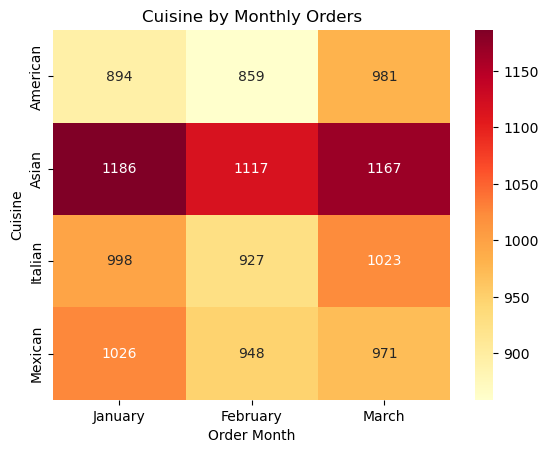

In [125]:
x = cuioa.pivot_table(index = 'Cuisine', columns = 'Order Month', values = 'Total Monthly Orders', aggfunc = 'sum')
x = x.reindex(['January','February', 'March'], axis = 1)
sns.heatmap(x.astype('float'), annot = True, cmap = 'YlOrRd',  fmt = 'g')
plt.title("Cuisine by Monthly Orders")

 #### 28. Analyze order changes over the months for all items.

In [127]:
query = '''
WITH IMO AS (SELECT item_id IID, item_name ITN, MONTH(order_date) Monthnum, MONTHNAME(order_date) Monthname, COUNT(order_id) Monthorders
FROM order_details od JOIN menu_items mi 
ON od.item_id = mi.menu_item_id
GROUP BY IID, ITN, Monthnum, Monthname
ORDER BY IID) 
SELECT IID AS 'Item ID', ITN, Monthname, Monthorders, 
SUM(Monthorders) OVER(PARTITION BY IID ORDER BY Monthnum),
CONCAT(ROUND(((Monthorders-LAG(Monthorders,1) OVER(PARTITION BY IID ORDER BY Monthnum))/LAG(Monthorders,1) OVER(PARTITION BY IID ORDER BY Monthnum)) * 100, 2), '%'),
CONCAT(ROUND((Monthorders/(SELECT SUM(Monthorders) FROM IMO)) * 100, 2), '%'),
ROUND(AVG(Monthorders) OVER(PARTITION BY IID ORDER BY Monthnum), 2),
LAG(Monthorders) OVER(PARTITION BY IID ORDER BY Monthnum), 
Monthorders - LAG(Monthorders) OVER(PARTITION BY IID ORDER BY Monthnum),
CONCAT(ROUND(((Monthorders - LAG(Monthorders) OVER(PARTITION BY IID ORDER BY Monthnum)) / Monthorders) * 100, 2), '%')
FROM IMO
'''
cur.execute(query)
data = cur.fetchall()
itoa = pd.DataFrame(data)
itoa.rename(columns = {0:'Item ID', 1:'Item Name', 2:'Order Month', 3:'Total Monthly Orders', 4:'Cumulative Orders', 5:'MoM Orders Growth Rate', 6:'Contribution %', 7:'Moving Average Orders', 8:'Previous Month Orders', 9:'Orders Difference', 10:'Orders Difference %'}, inplace = True)
itoa

,Item ID,Item Name,Order Month,Total Monthly Orders,Cumulative Orders,MoM Orders Growth Rate,Contribution %,Moving Average Orders,Previous Month Orders,Orders Difference,Orders Difference %
0,101,Hamburger,January,206,206,None,1.70%,206.00,NaN,NaN,None
1,101,Hamburger,February,187,393,-9.22%,1.55%,196.50,206.0,-19.0,-10.16%
2,101,Hamburger,March,229,622,22.46%,1.89%,207.33,187.0,42.0,18.34%
3,102,Cheeseburger,January,197,197,None,1.63%,197.00,NaN,NaN,None
4,102,Cheeseburger,February,200,397,1.52%,1.65%,198.50,197.0,3.0,1.50%
...,...,...,...,...,...,...,...,...,...,...,...
91,131,Chicken Parmesan,February,107,230,-13.01%,0.88%,115.00,123.0,-16.0,-14.95%
92,131,Chicken Parmesan,March,134,364,25.23%,1.11%,121.33,107.0,27.0,20.15%
93,132,Eggplant Parmesan,January,143,143,None,1.18%,143.00,NaN,NaN,None
94,132,Eggplant Parmesan,February,139,282,-2.80%,1.15%,141.00,143.0,-4.0,-2.88%


Text(0.5, 1.0, 'Items by Monthly Orders')

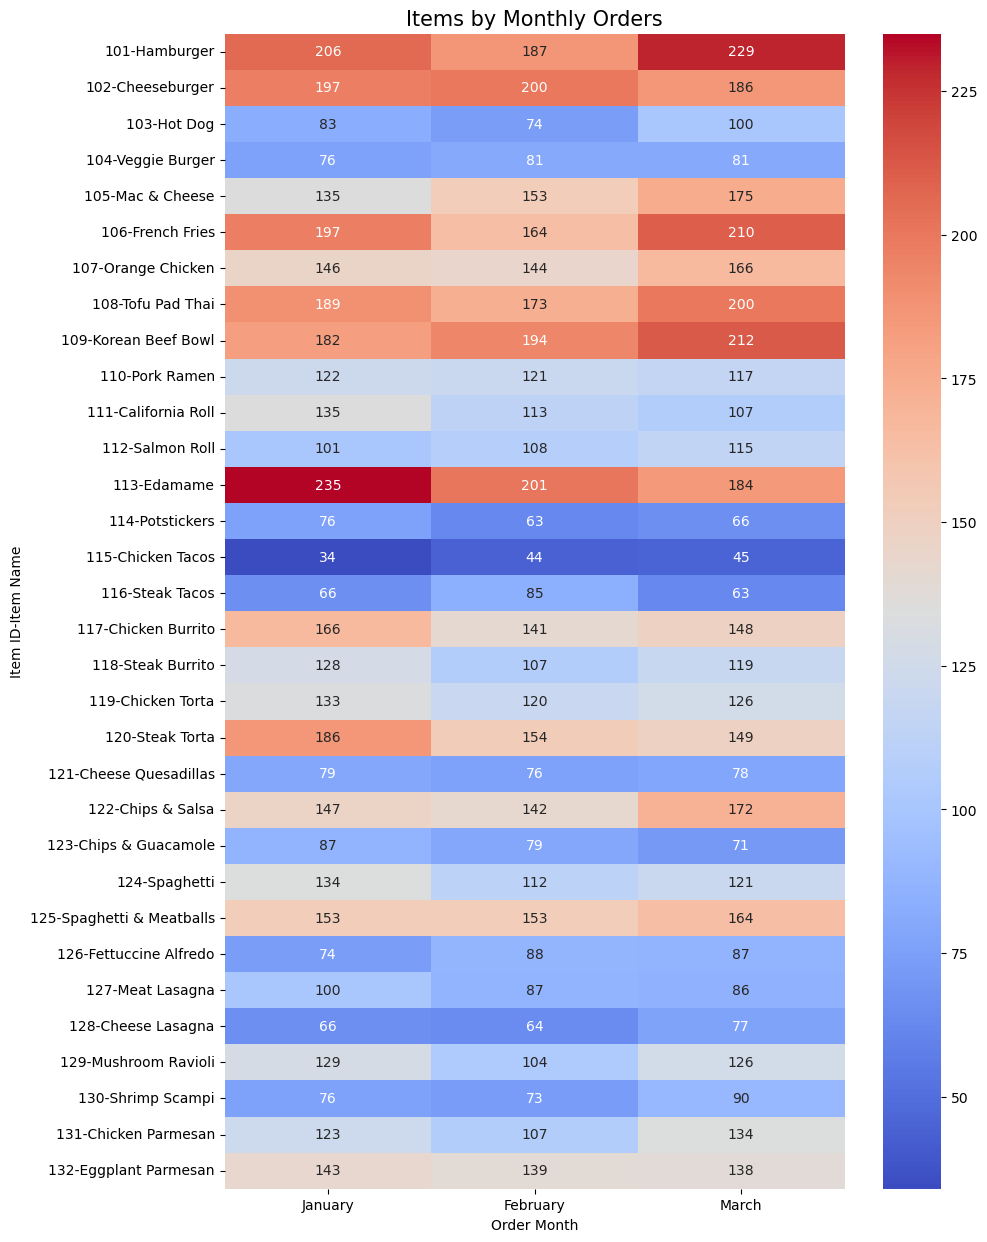

In [128]:
plt.figure(figsize = (10, 15))
x = itoa.pivot_table(index = ['Item ID','Item Name'], columns = 'Order Month', values = 'Total Monthly Orders', aggfunc = 'sum')
x = x.reindex(['January','February', 'March'], axis = 1)
sns.heatmap(x.astype('float'), annot = True, cmap = 'coolwarm',  fmt = 'g')
plt.title("Items by Monthly Orders", fontsize = 15)